# Plotting agreement of the subjects over time for the Box the Jet workflow. Sorted by SOL/ HEK event
## Need: Meta_data_subjects.json
This jupyter notebook plots the results of the Jet or No question, the Jet distribution over the subjects of the reported HEK event  
Since the subjects are shorter than research to the duration of solar jets has shown us, we expect jets appearing in multiple subjects.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

import datetime
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from IPython.display import Image

from aggregation import QuestionResult, MetaFile

%matplotlib inline

In [7]:
# initiate the filled data set as a class
data_T3 = QuestionResult('reductions/question_reducer_box_the_jets.csv')

# Calculate the agreement
agreement_T3, jet_mask_T3, non_jet_mask_T3, Ans_T3 = data_T3.Agr_mask(data_T3.data)

metafile= MetaFile('../Meta_data_subjects.json')
subjects=data_T3.subjects
SOL_unique=np.unique(metafile.getSubjectByKeyByList(subjects, '#sol_standard'))



In [8]:
def make_SOL_folder(SOL_name):
    path = 'SOL/Agreement_{}/'.format(SOL_name)
    #check if folder for plots exists
    isExist = os.path.exists(path)
    if not isExist: 
      os.makedirs(path)
      print("Agreement_{} directory is created".format(SOL_name))
        
        
make_SOL_folder('SOL_T3')

In [9]:
def plot_agreement(sol_event,obs_time,agreement,jet_mask,non_jet_mask):
    fig, ax = plt.subplots(dpi=150,figsize=(5,3))
    try: 
        plt.bar(obs_time[non_jet_mask],agreement[non_jet_mask],width=0.003, alpha=0.15,color='grey')
        plt.scatter(obs_time[non_jet_mask],[1]*len(obs_time[non_jet_mask]),color="grey", alpha=0.45, s=5)
    except:
        print('happens') #Not printed so if only yes jets this try execept does not work breaking the plot
    pass

    try:
        plt.bar(obs_time[jet_mask],agreement[jet_mask],width=0.003, alpha=0.25,color='green')
        plt.scatter(obs_time[jet_mask],[1]*len(obs_time[jet_mask]),color="green", alpha=0.65, s=5)
    except:
        print('No jets in this event')

    date_form = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    plt.title(sol_event)
    plt.xlabel('Time')
    plt.ylabel('Agreement')
    plt.ylim(0,1.7)
    #Legend
    d1 = Line2D([0], [0], marker='o', color='w',markerfacecolor='green', markersize=5)
    d2 = Line2D([0], [0], marker='o', color='w',markerfacecolor='grey', markersize=5)
    m3, = ax.plot([], [], c='grey' ,alpha=0.25, marker='s', markersize=10,
              fillstyle='left', linestyle='none')
    m4, = ax.plot([], [], c='green' ,alpha=0.25, marker='s', markersize=10,
              fillstyle='right', linestyle='none')
    ax.legend(((d1),(d2), (m3, m4)), ('Contains jet', 'Contains no jet','Agreement'), numpoints=1, labelspacing=0.3,
          loc='upper right', fontsize=9)
    #
    plt.savefig('SOL/Agreement_SOL_T3/'+sol_event.replace(':','-')+'.png',bbox_inches="tight")
    plt.show()


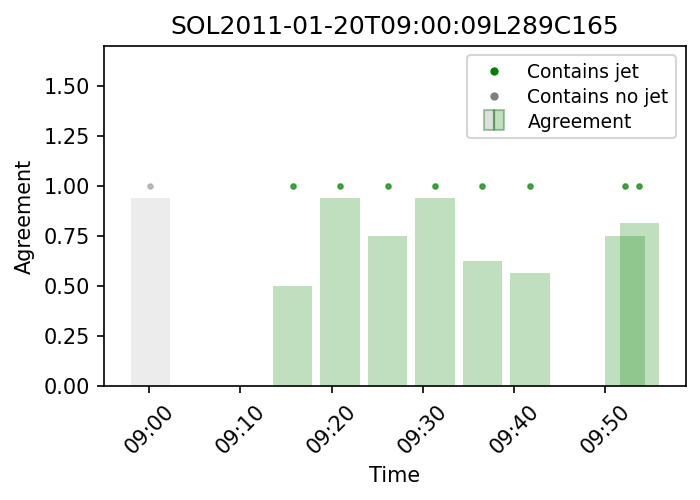

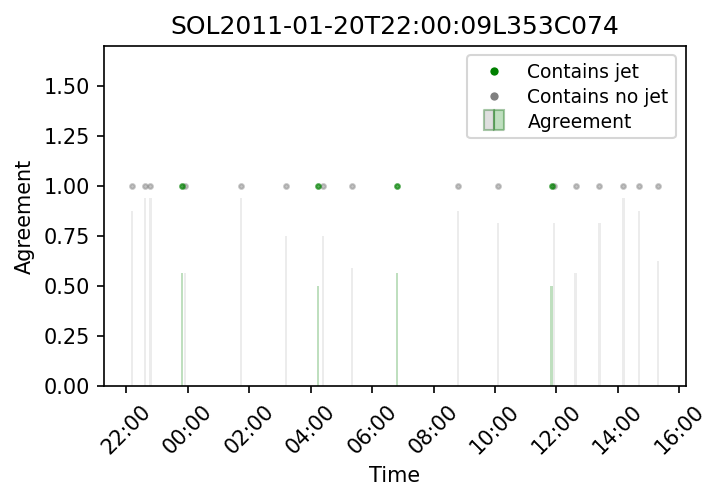

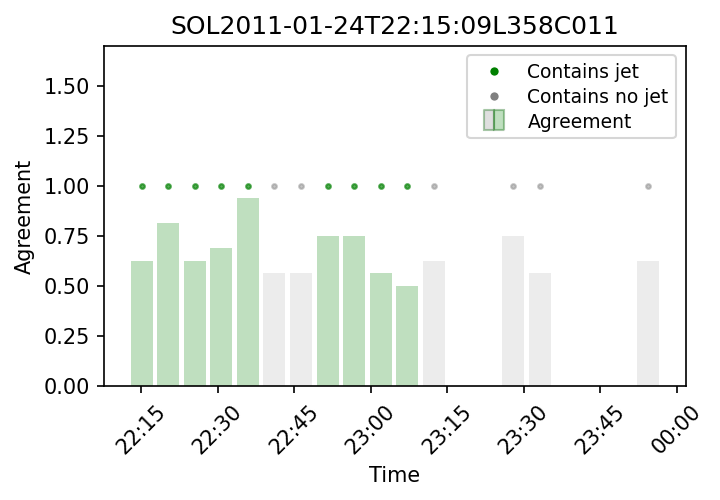

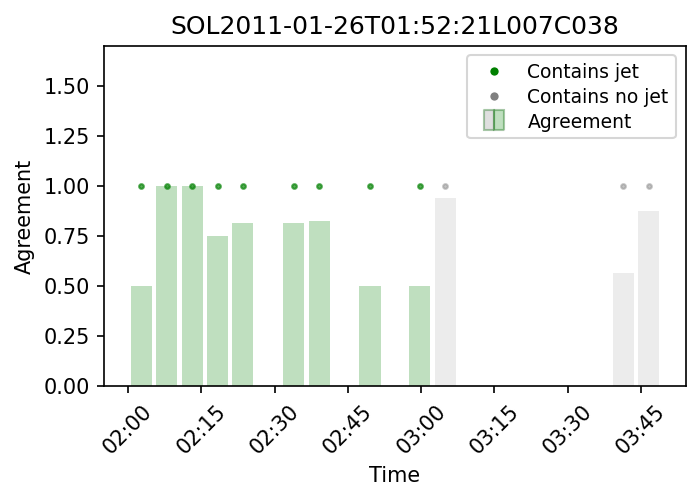

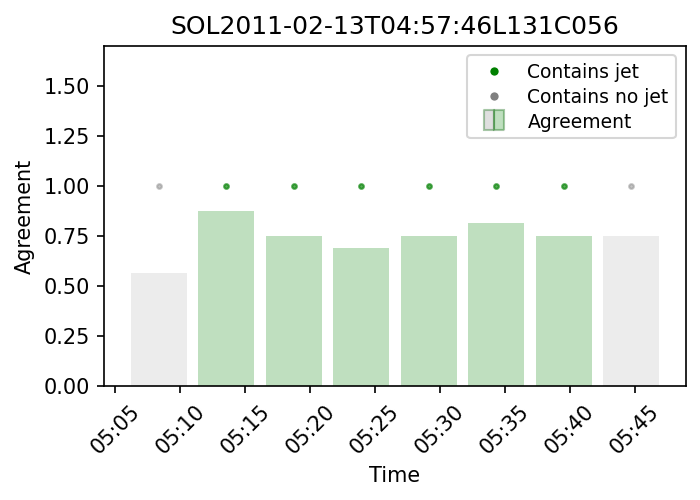

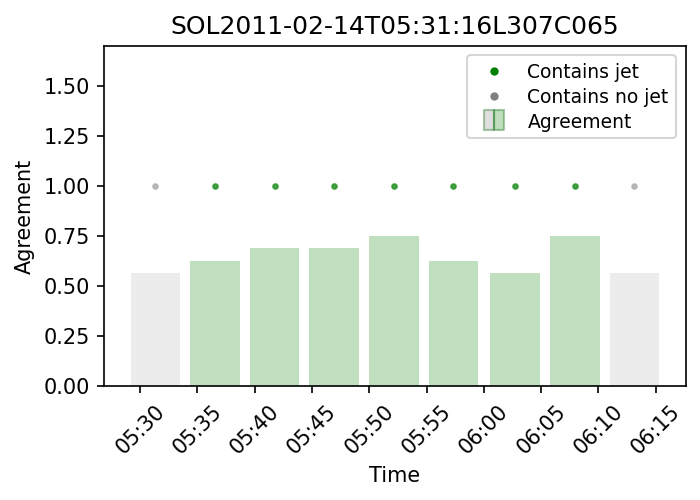

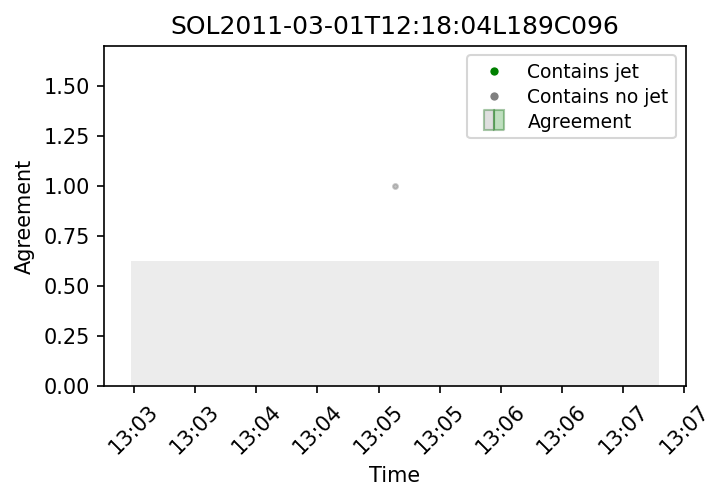

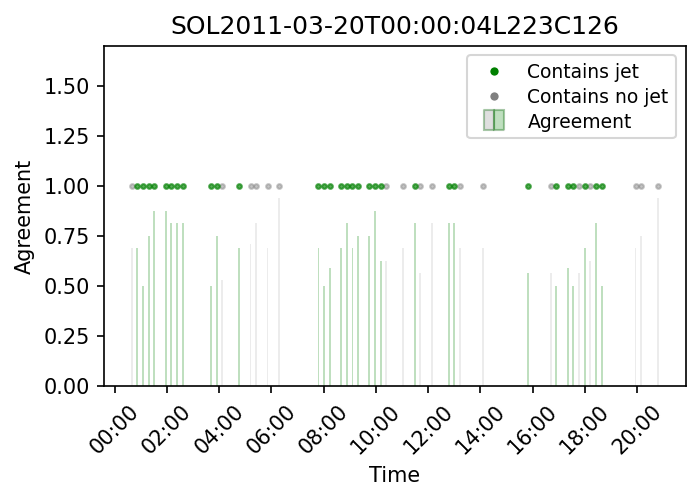

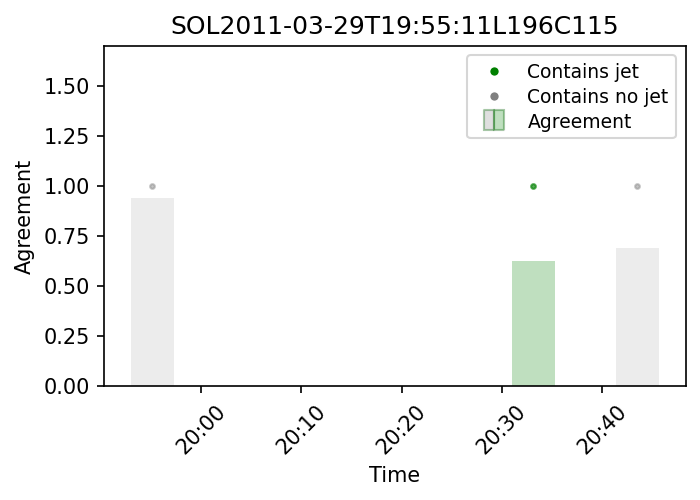

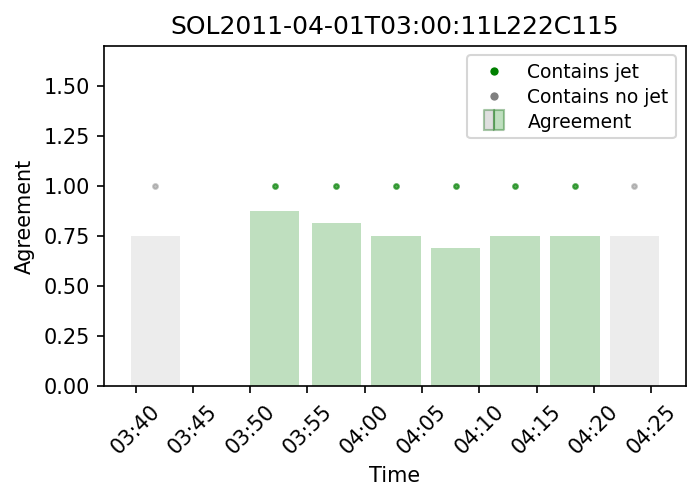

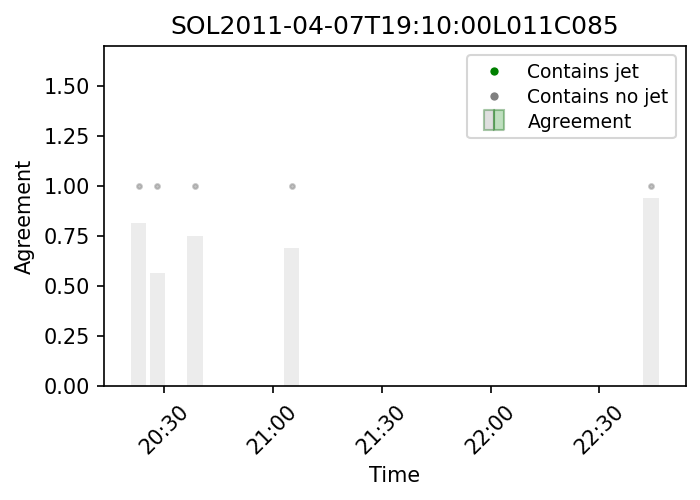

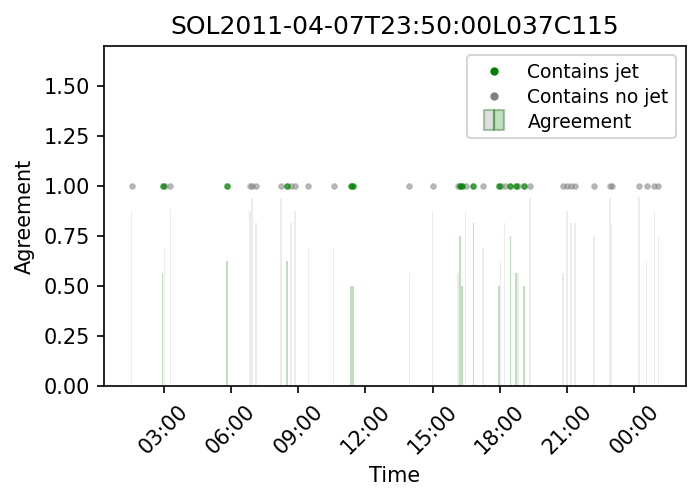

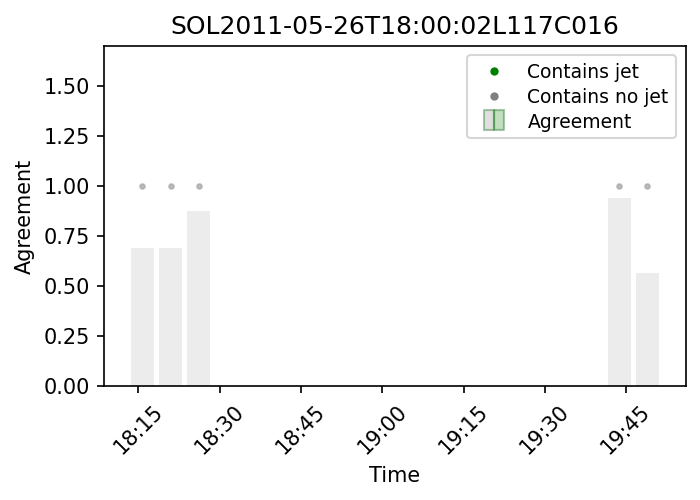

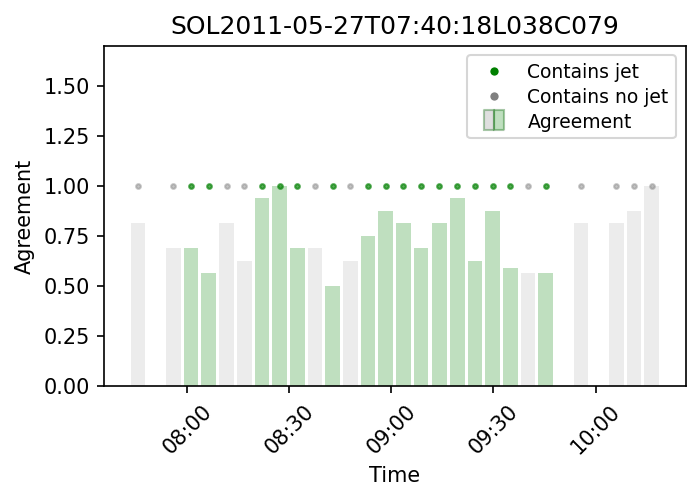

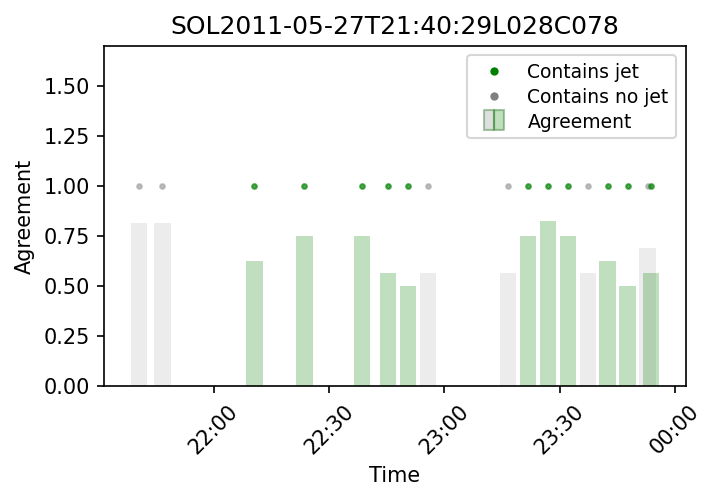

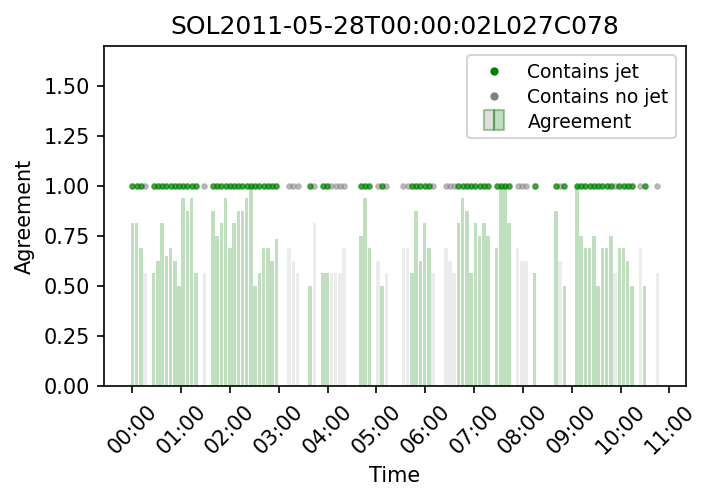

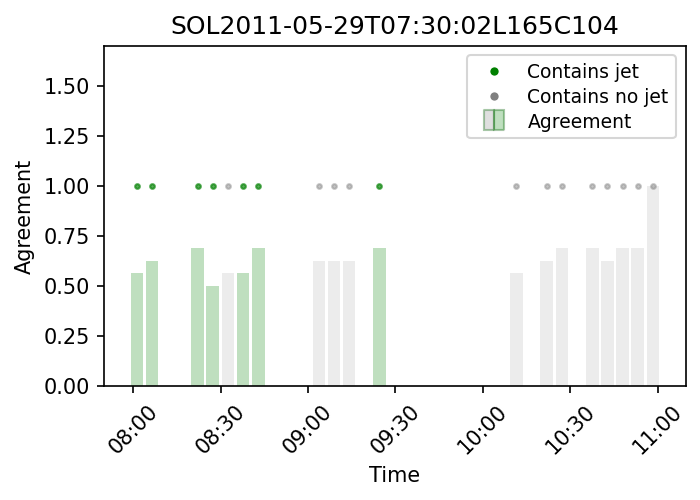

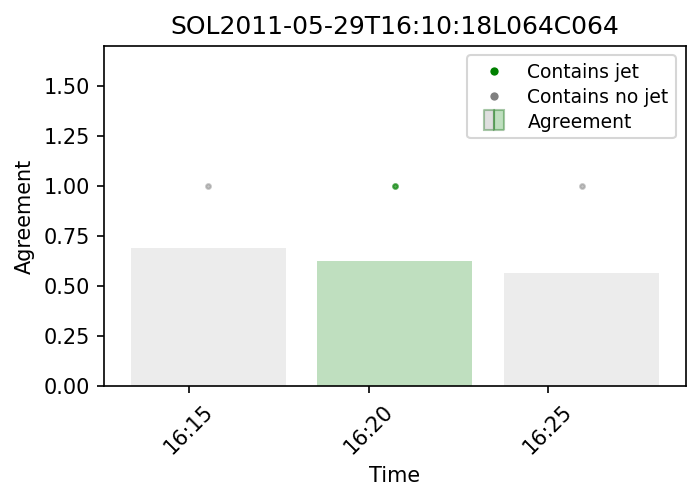

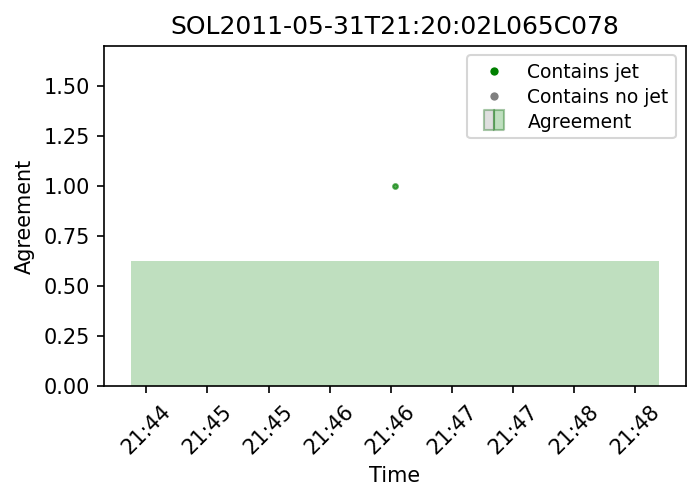

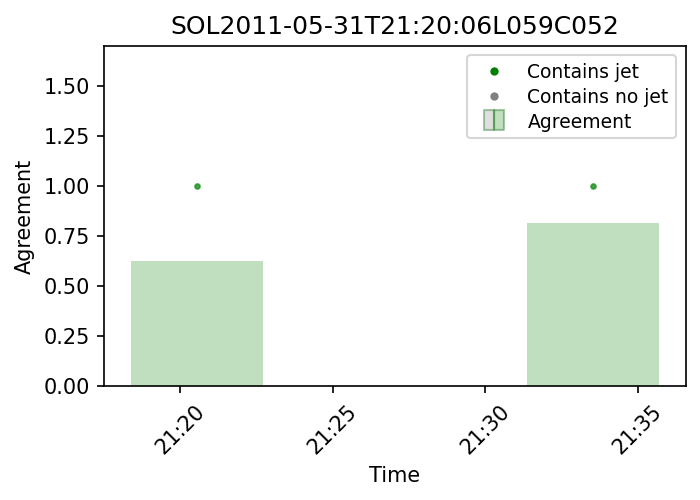

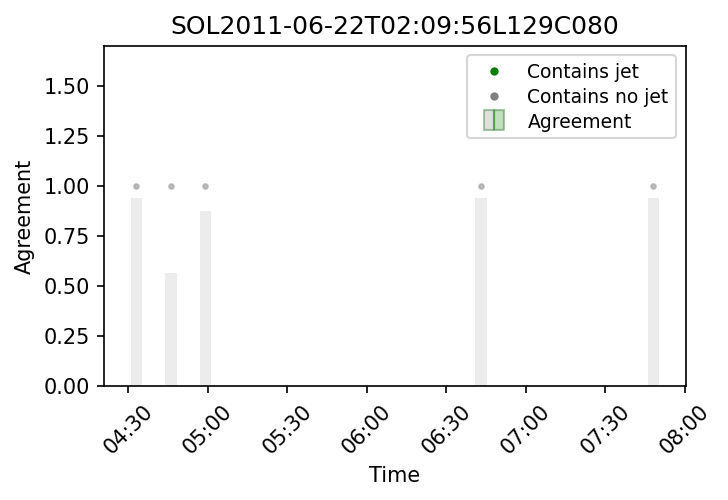

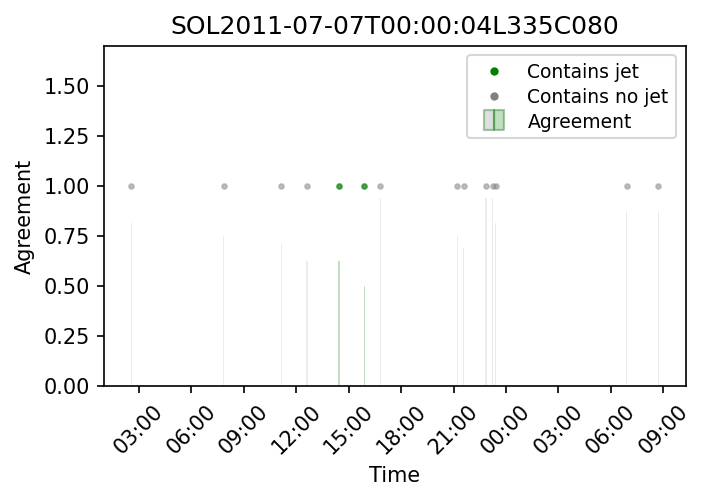

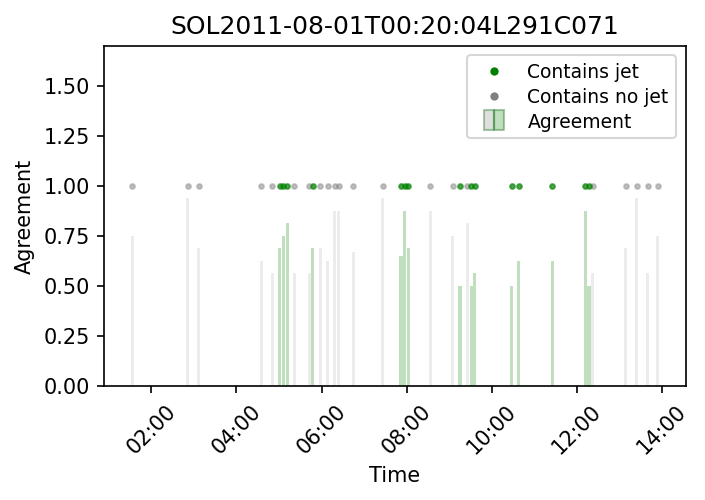

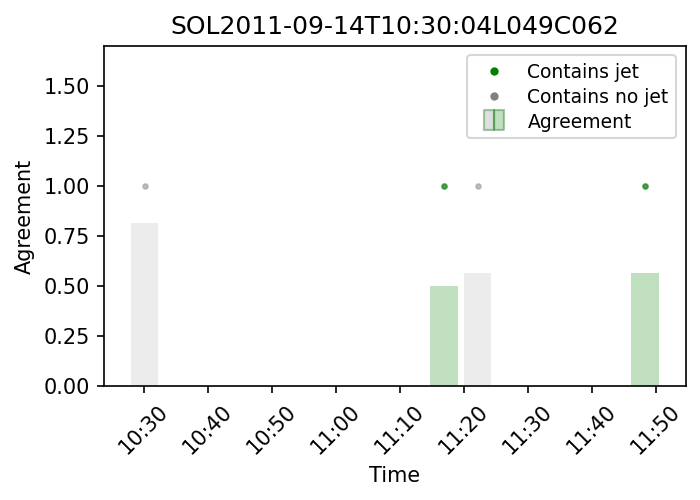

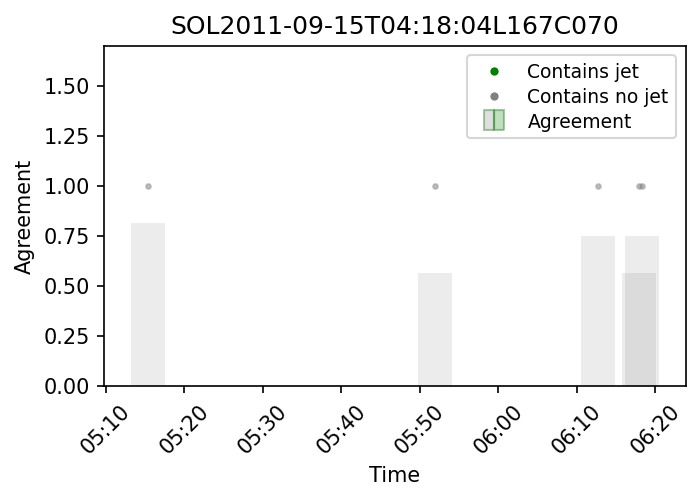

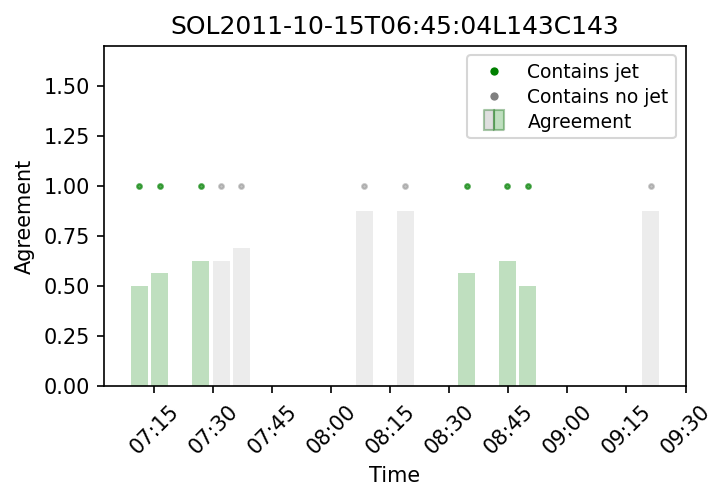

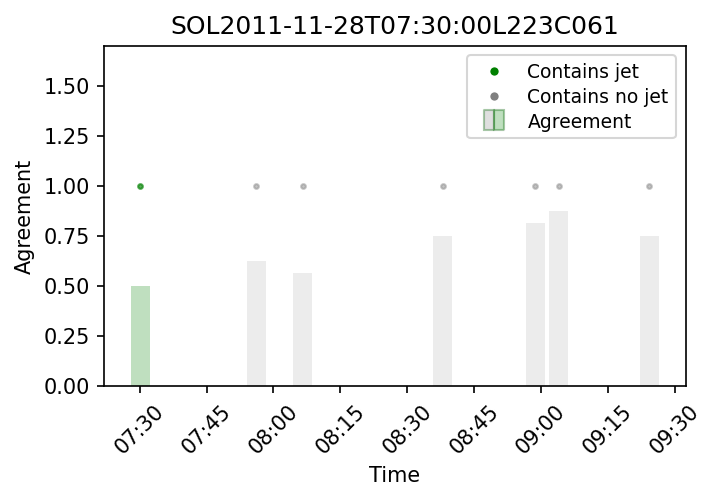

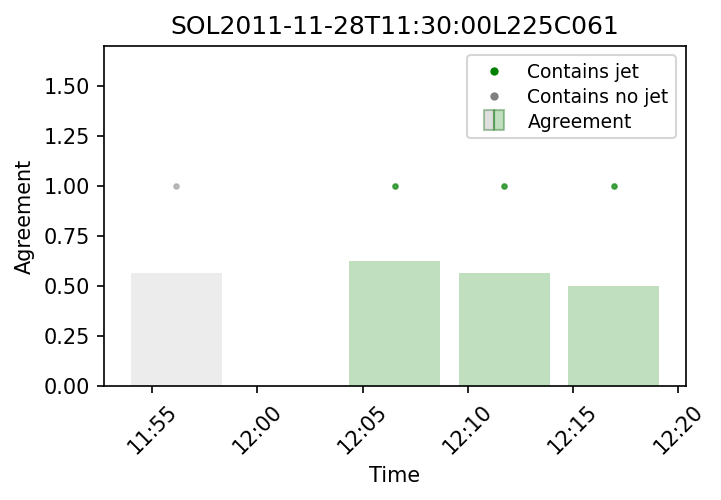

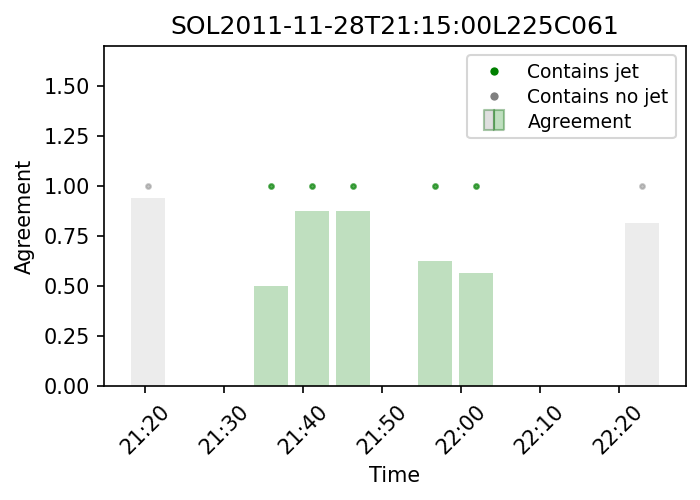

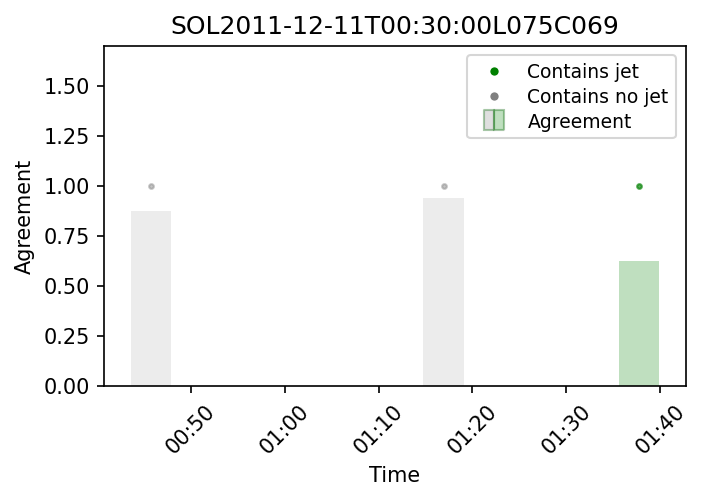

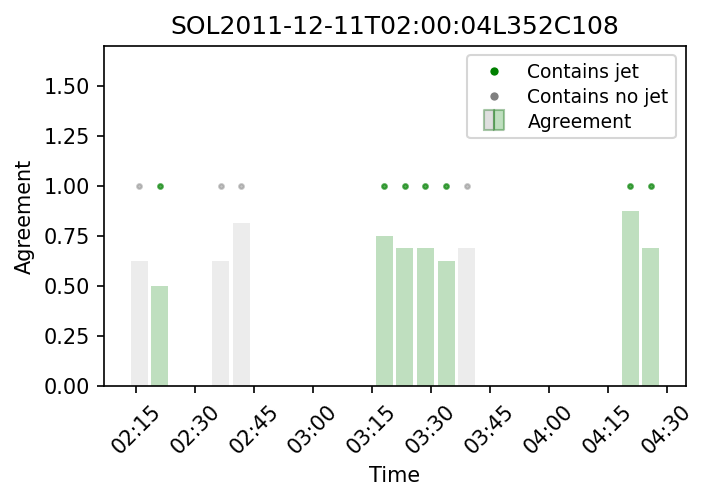

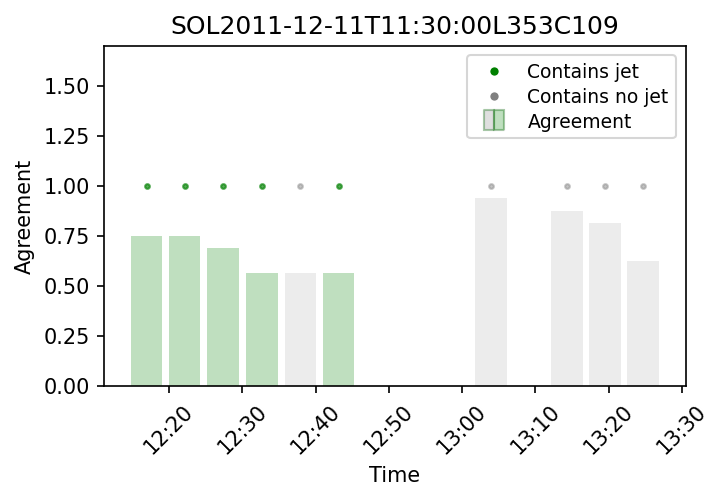

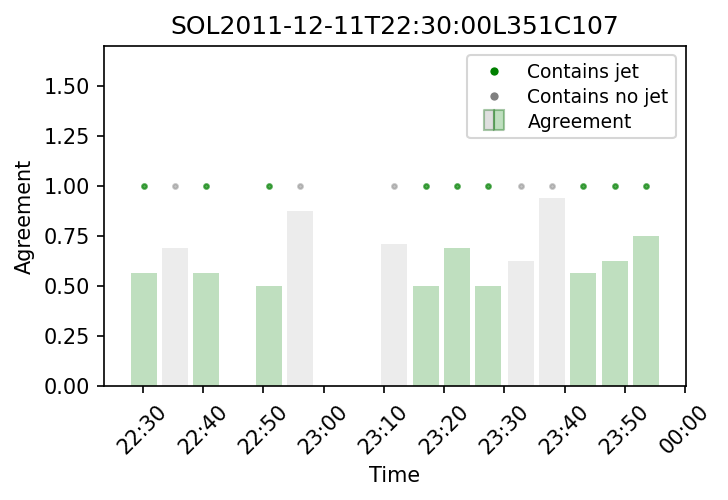

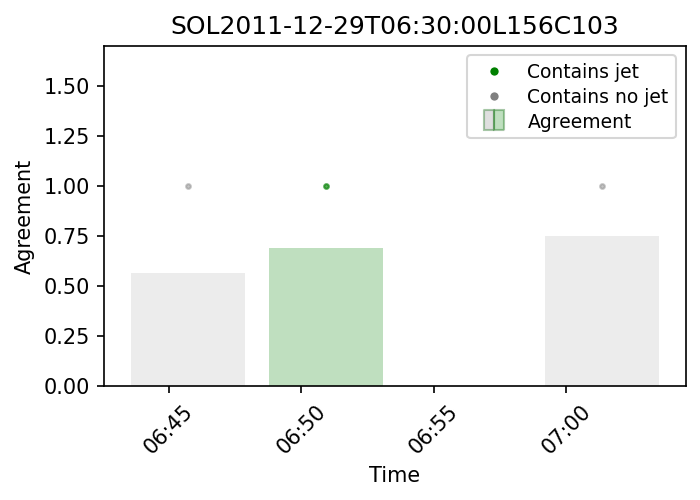

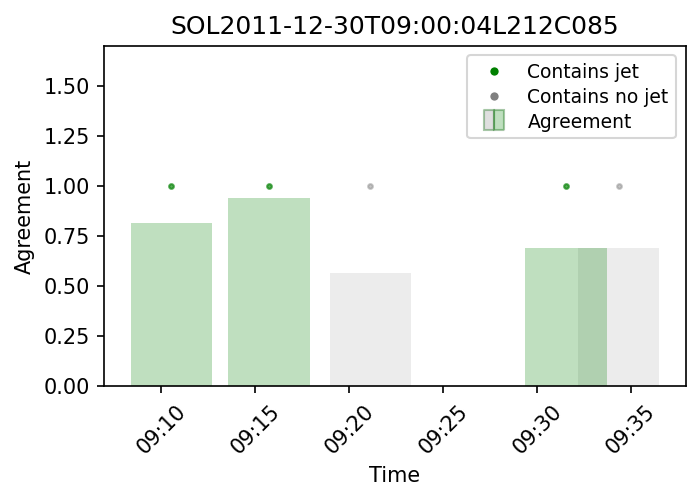

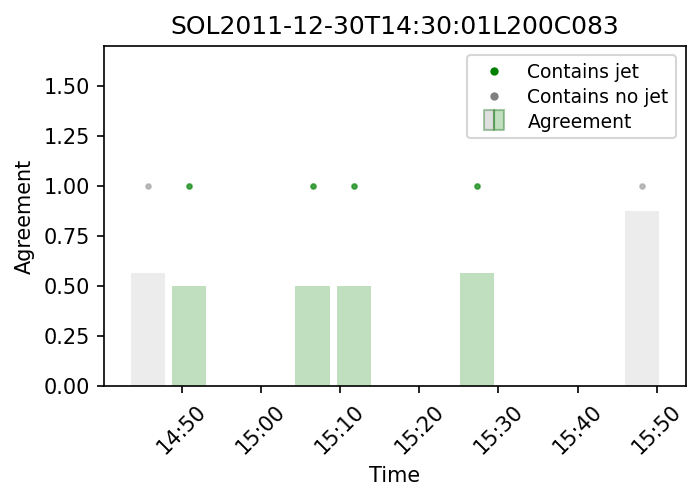

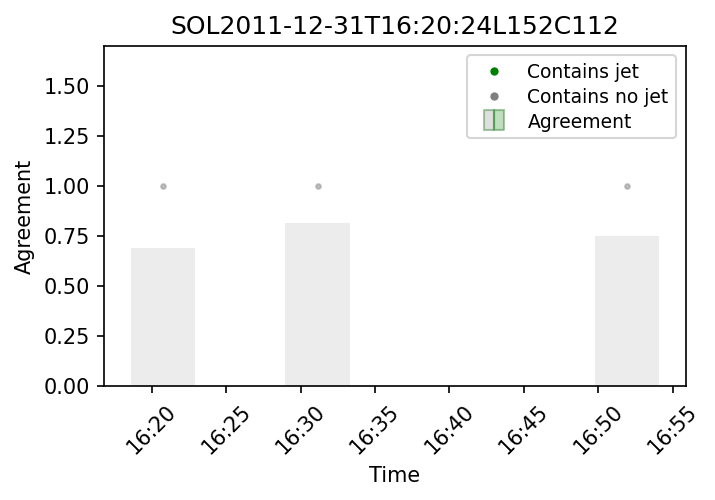

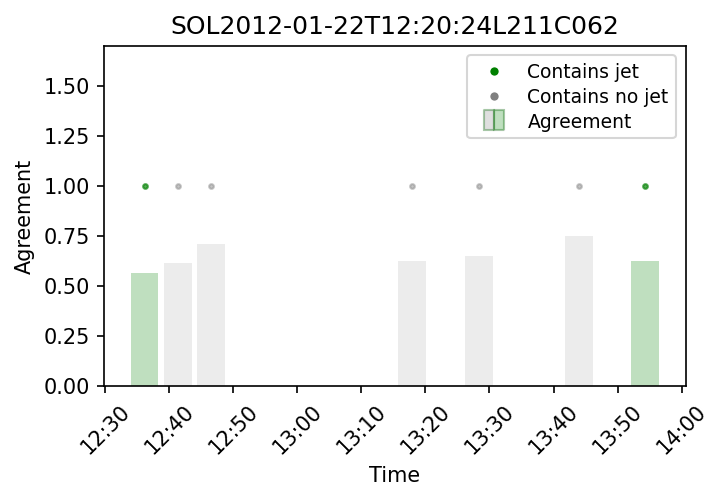

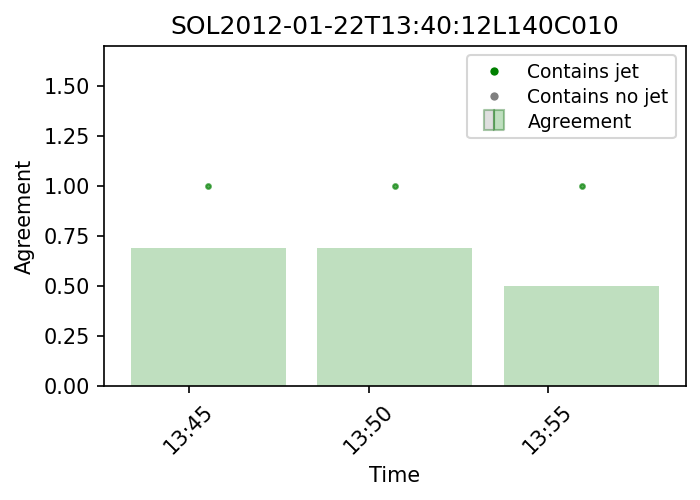

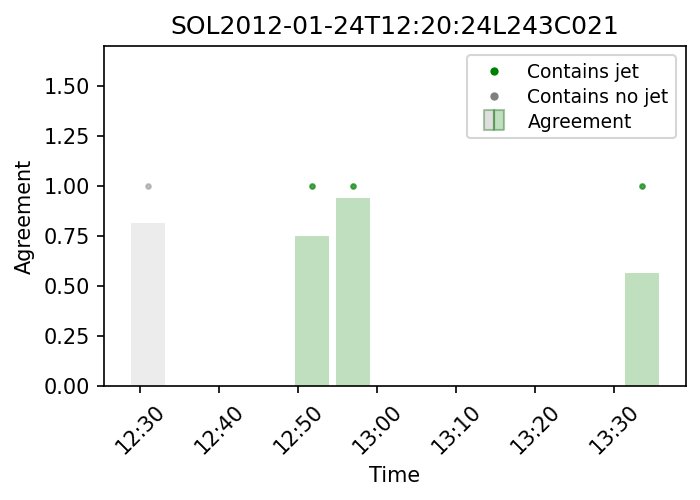

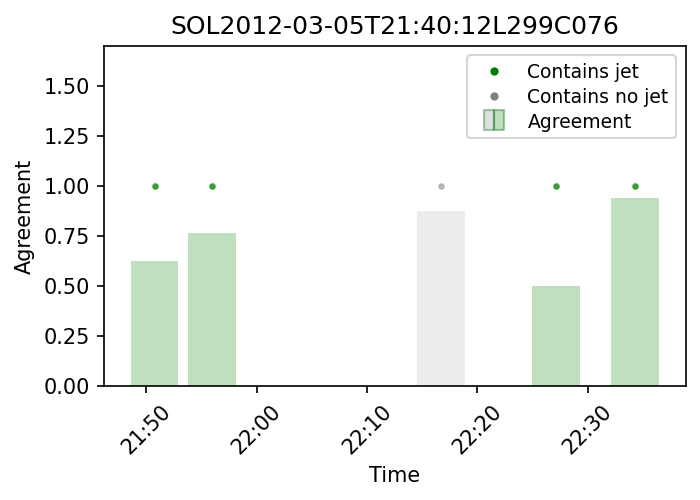

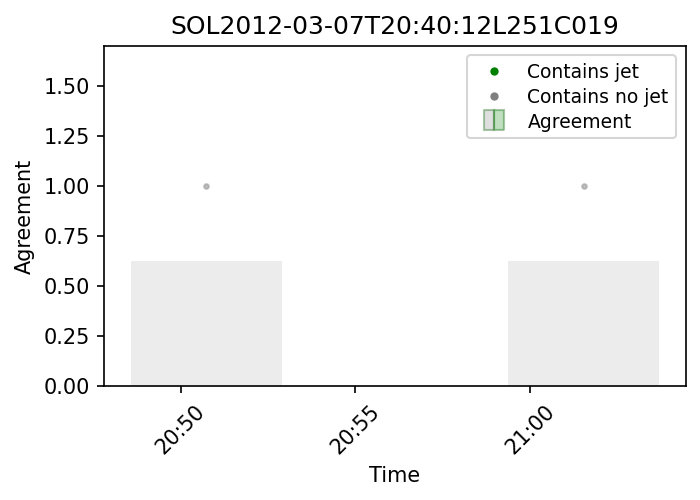

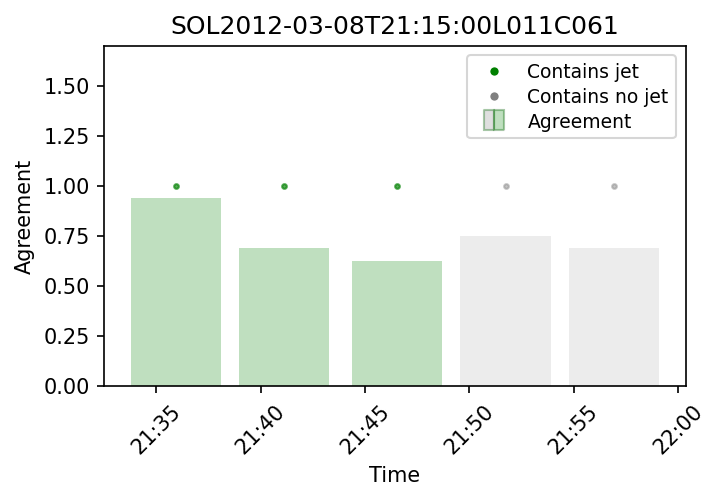

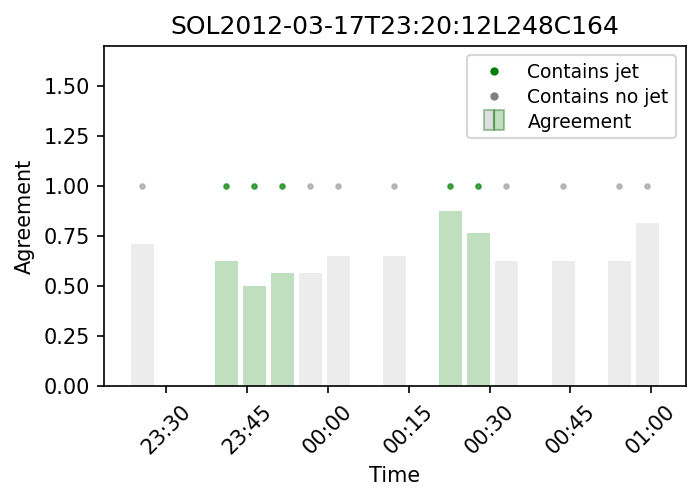

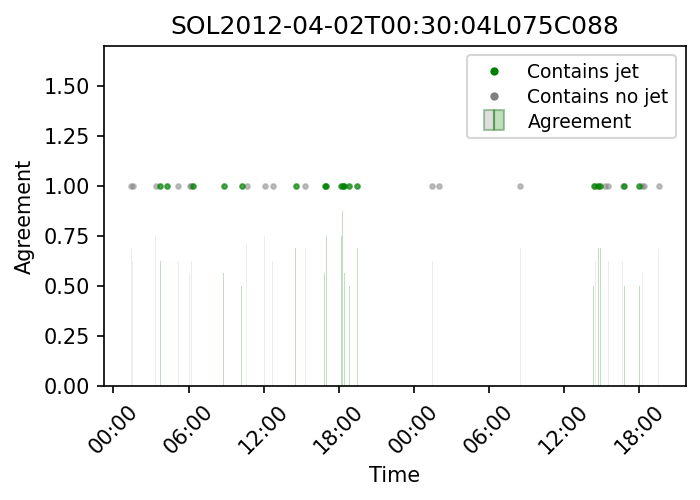

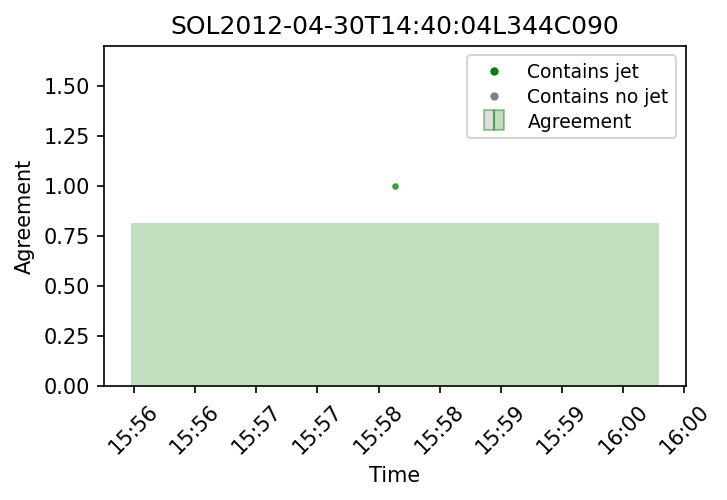

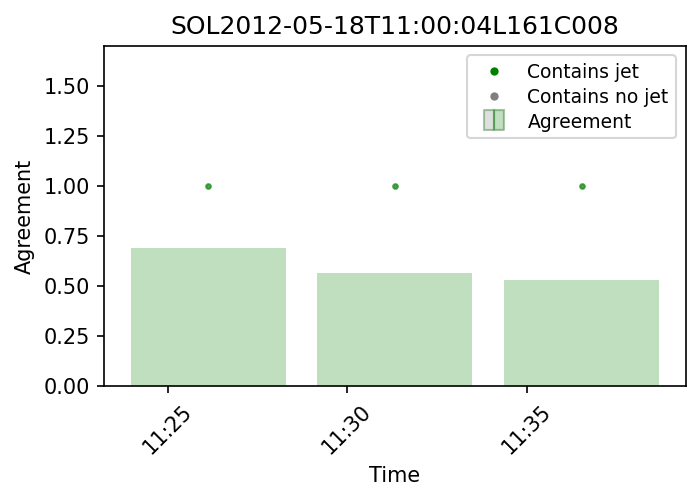

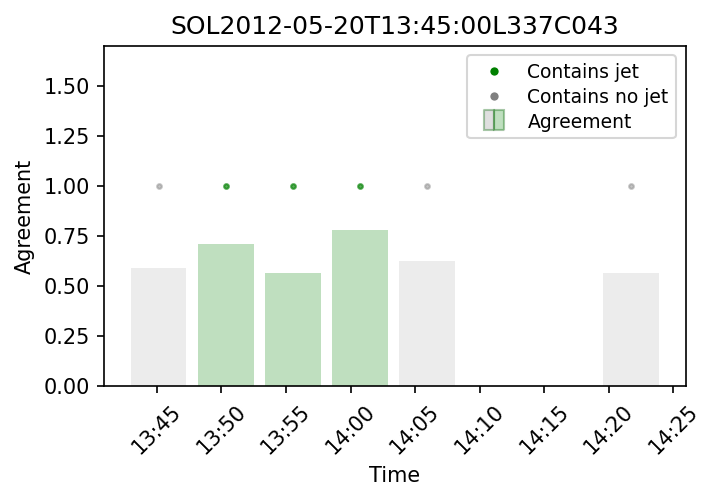

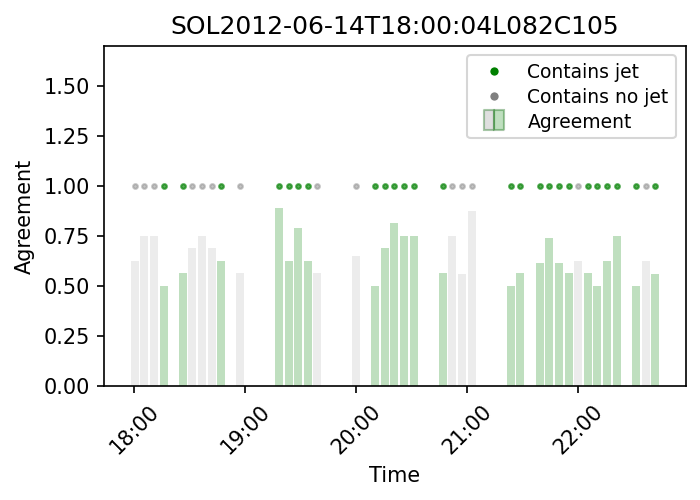

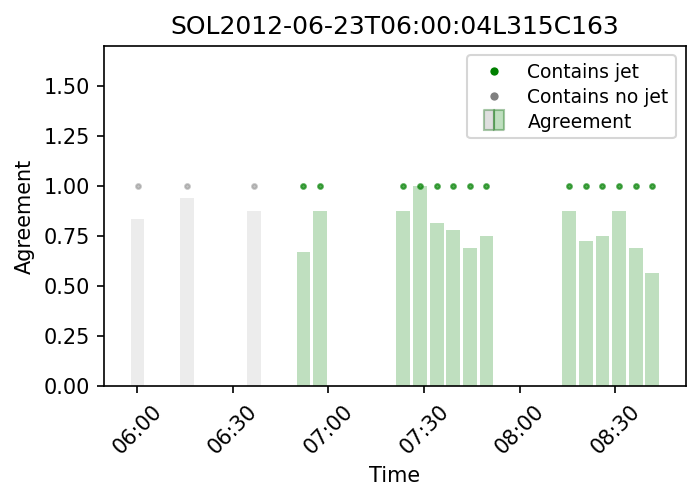

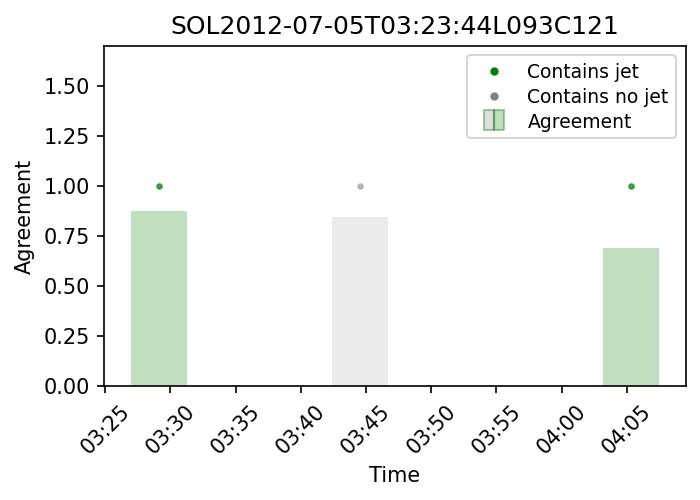

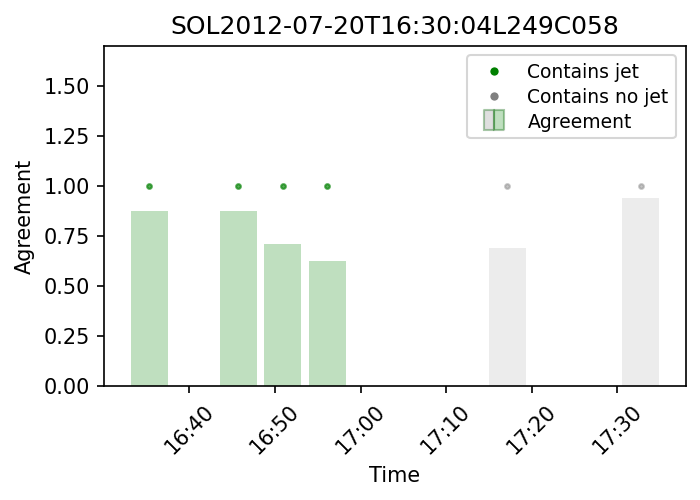

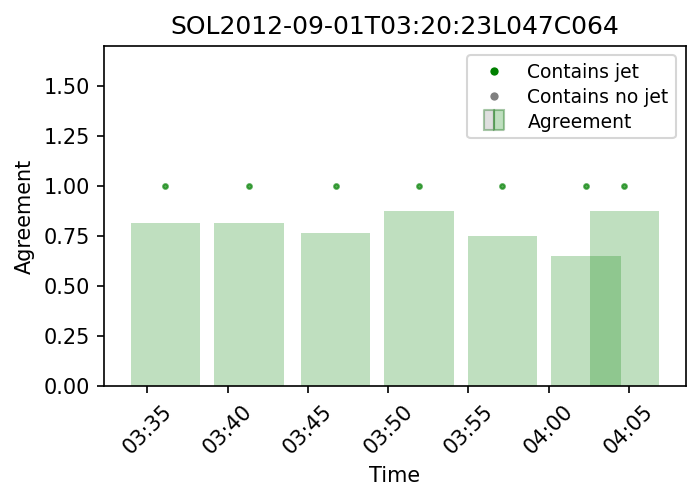

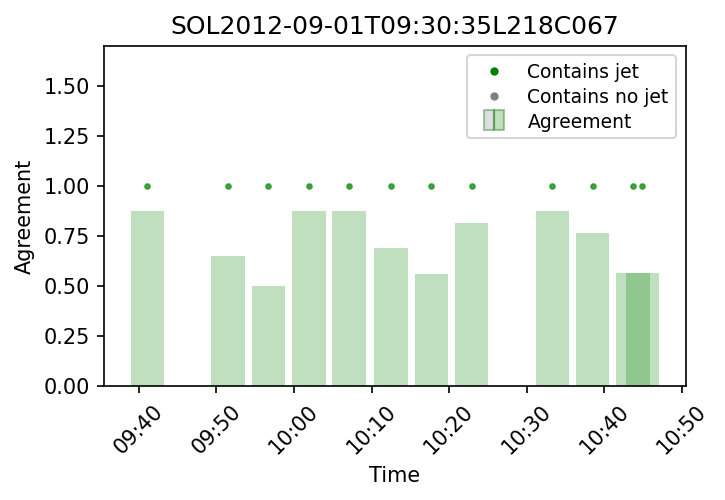

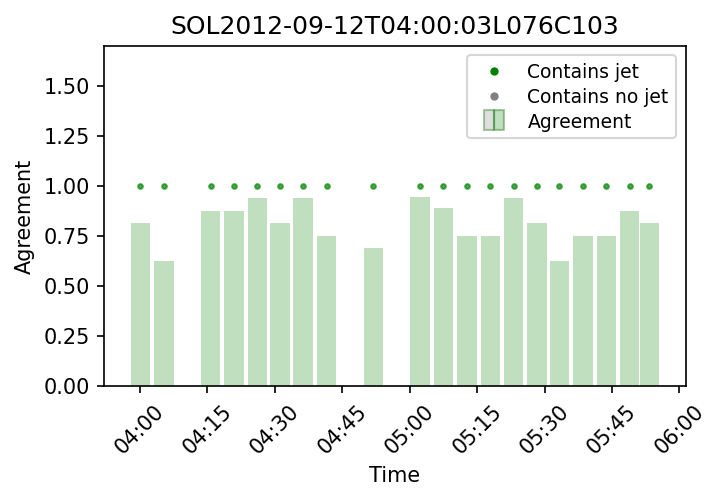

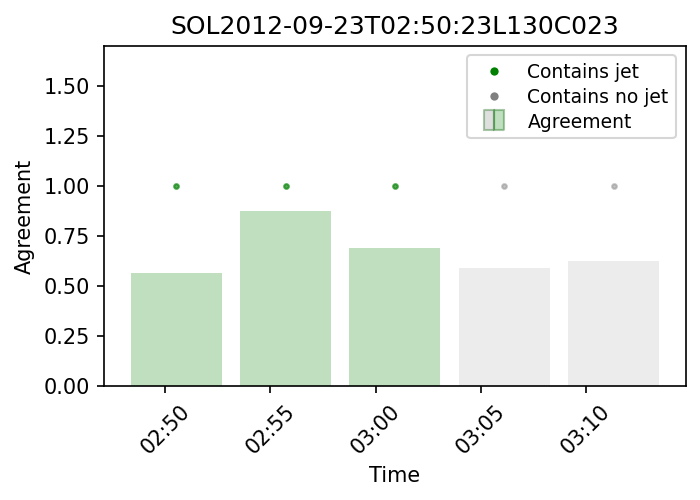

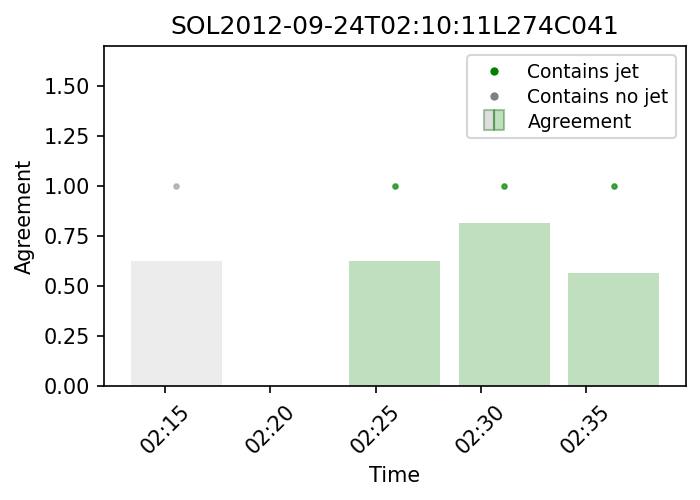

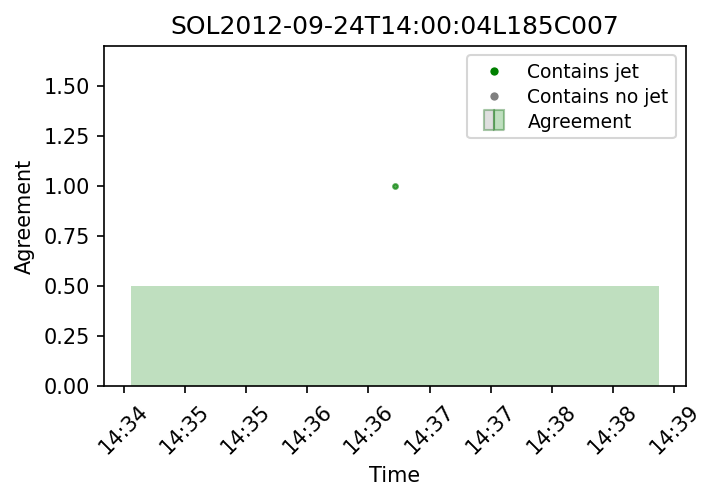

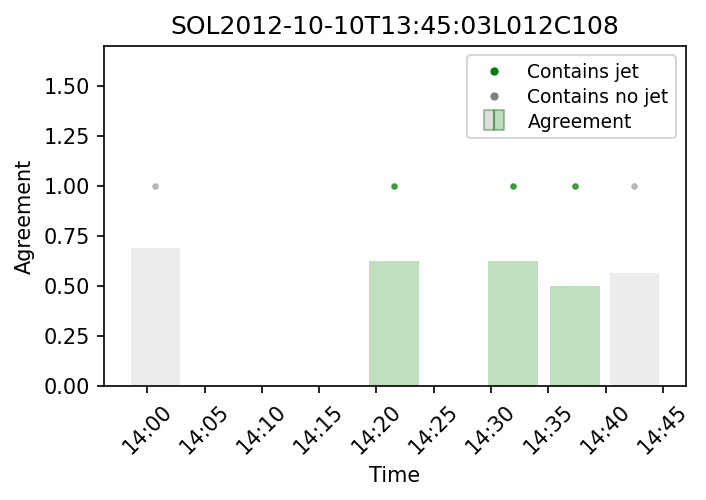

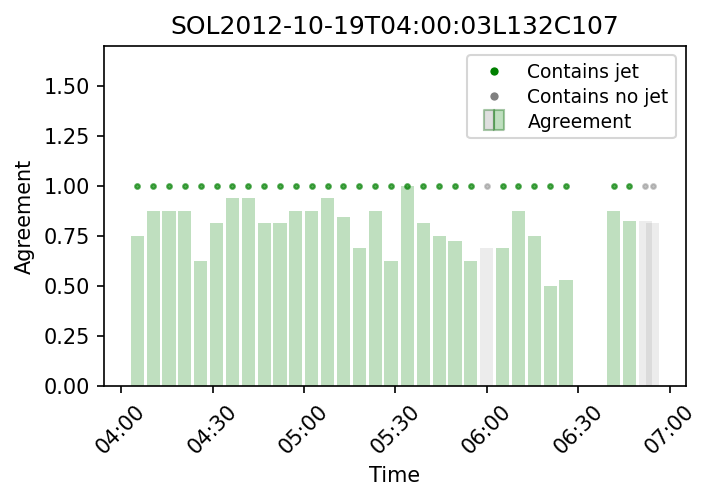

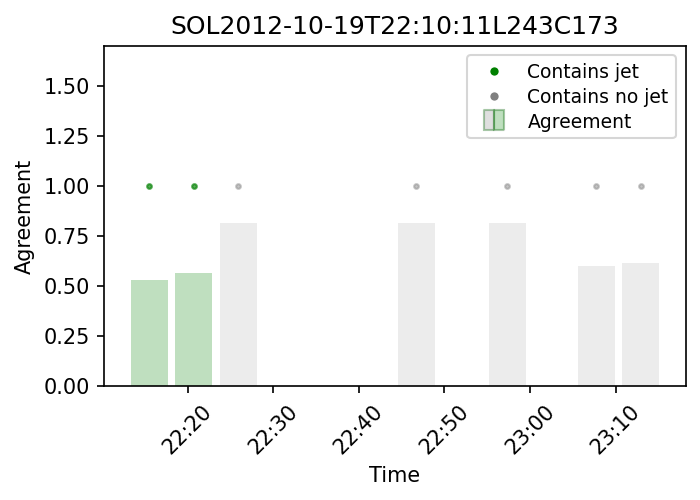

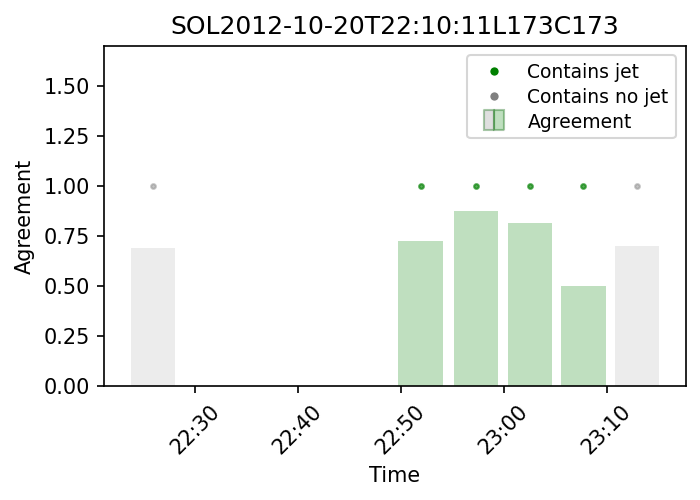

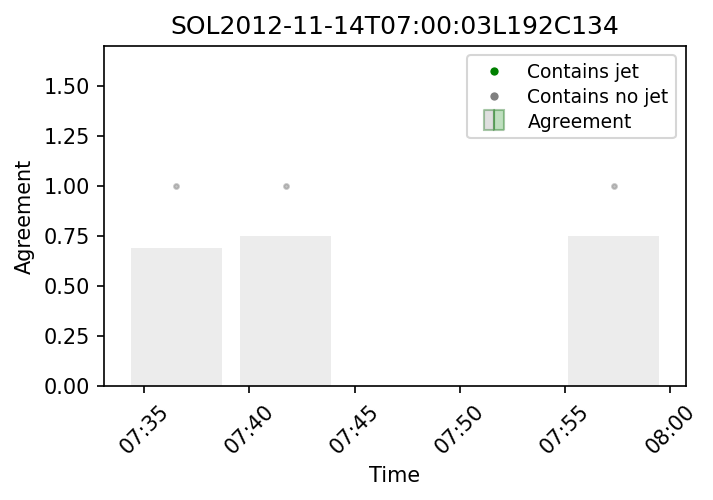

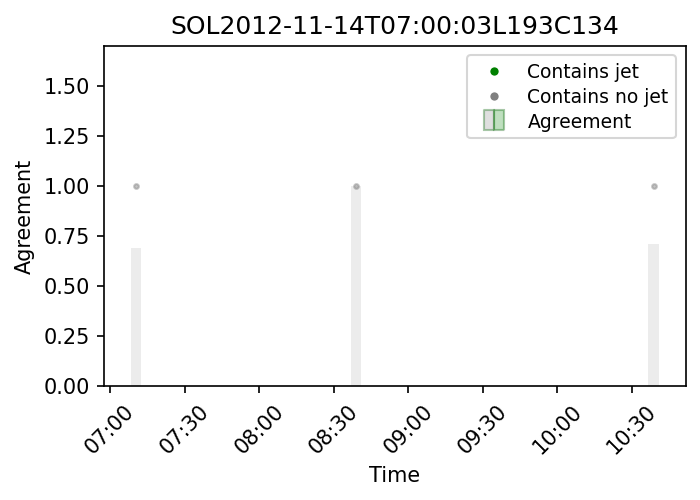

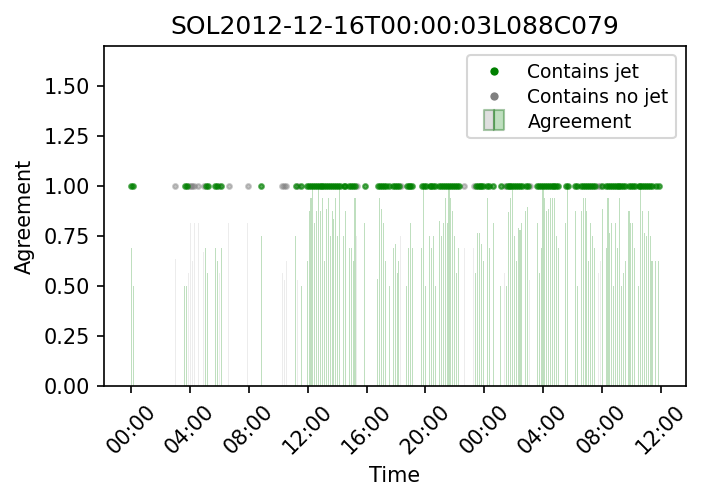

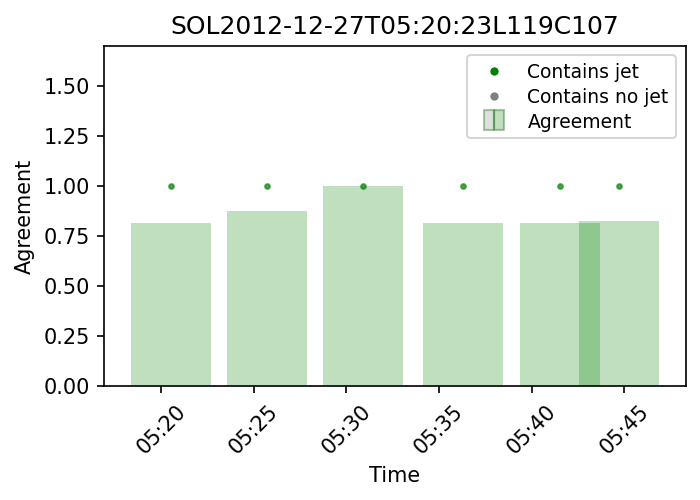

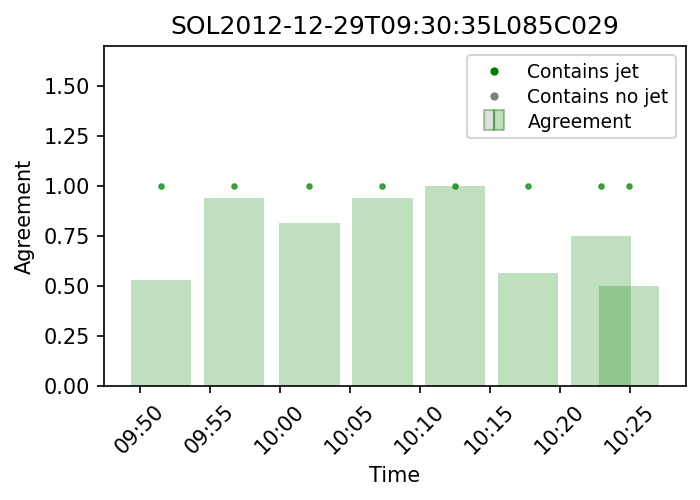

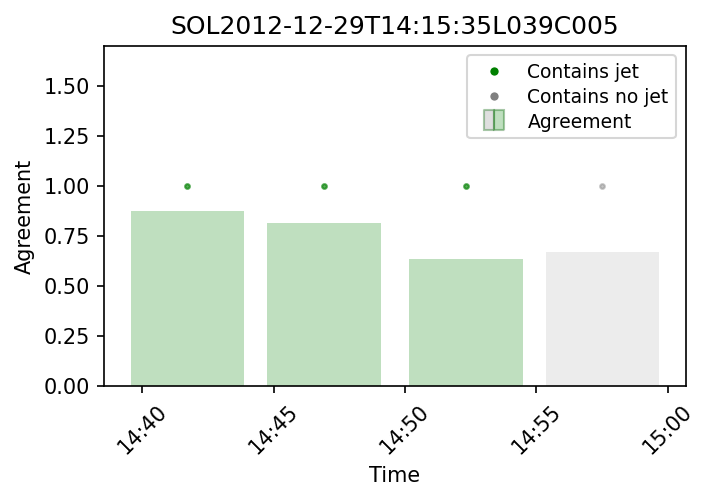

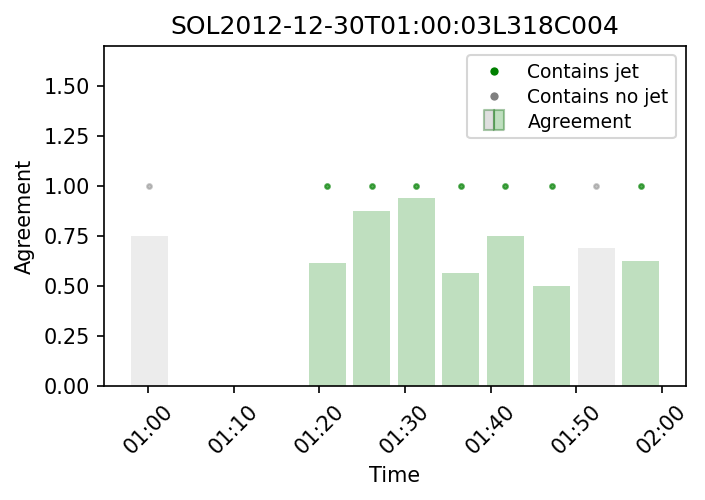

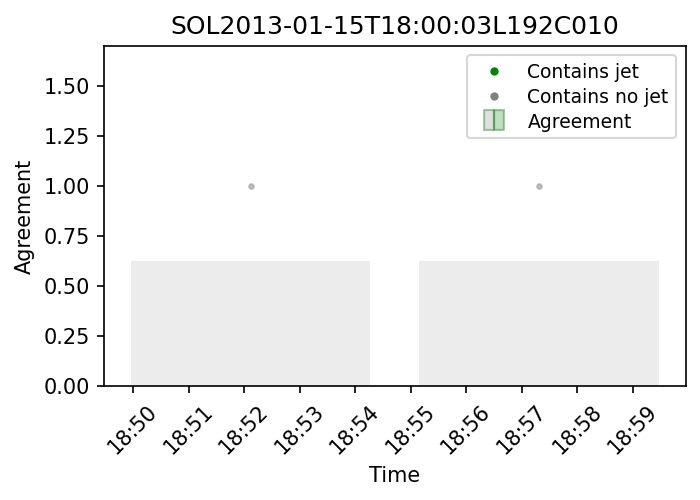

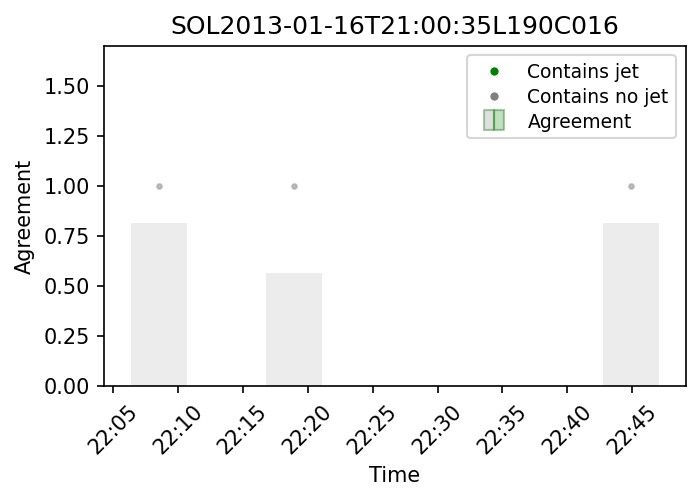

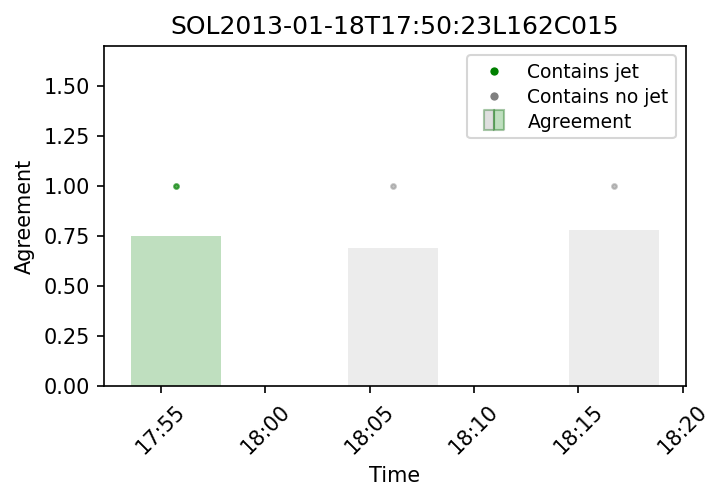

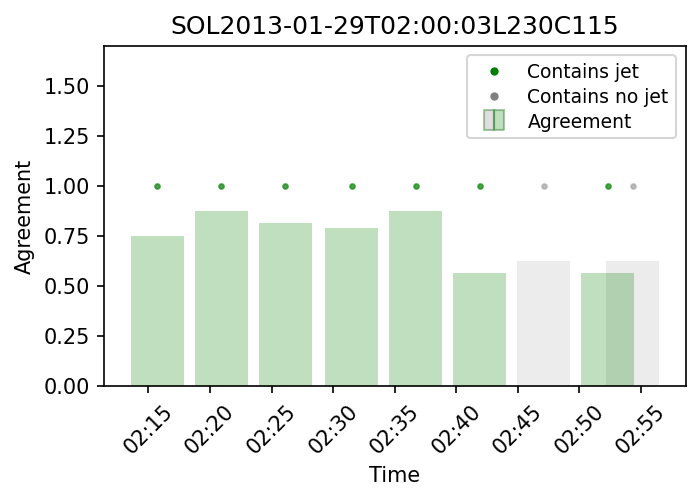

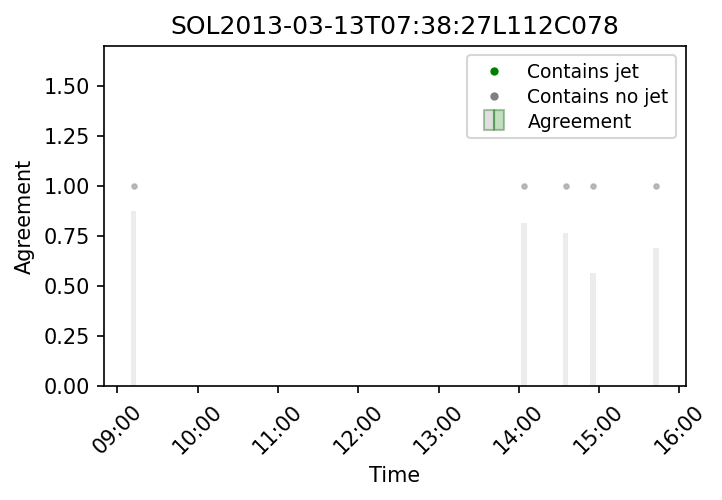

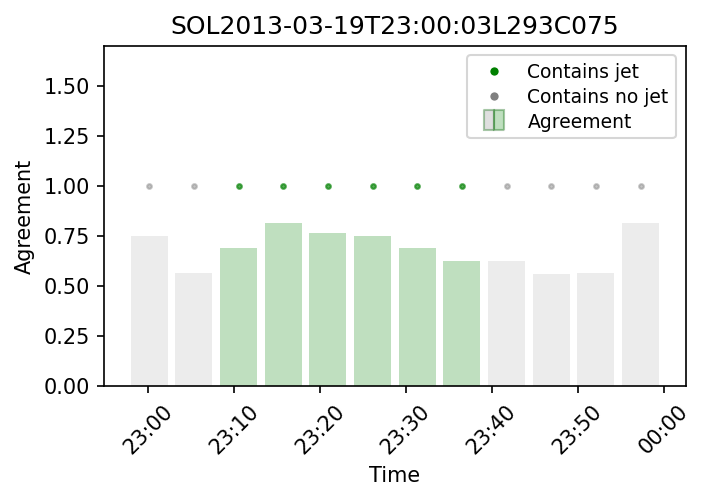

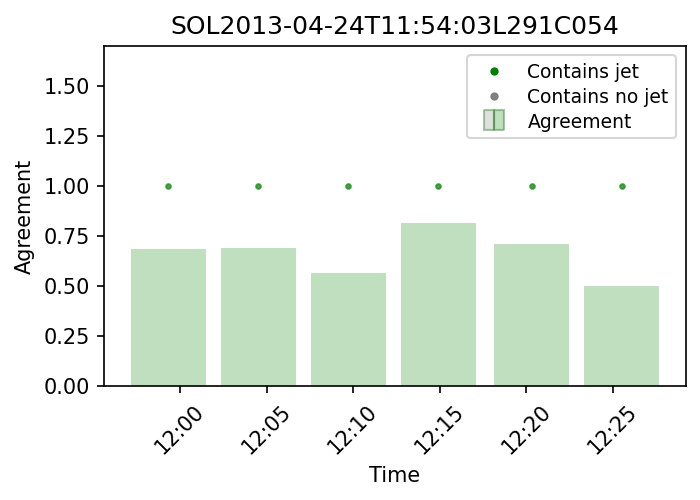

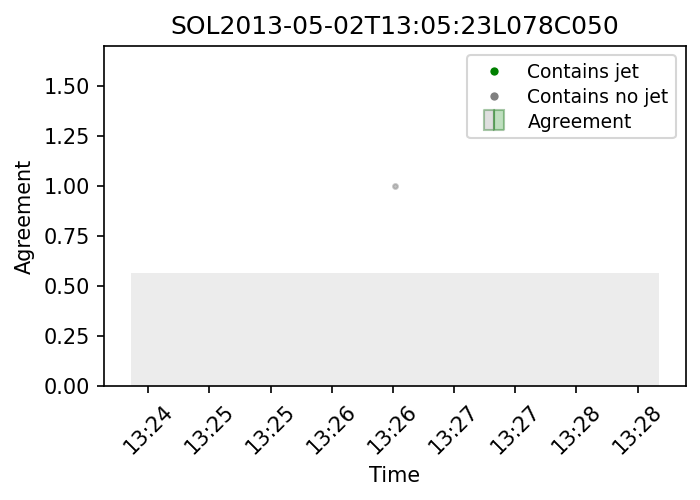

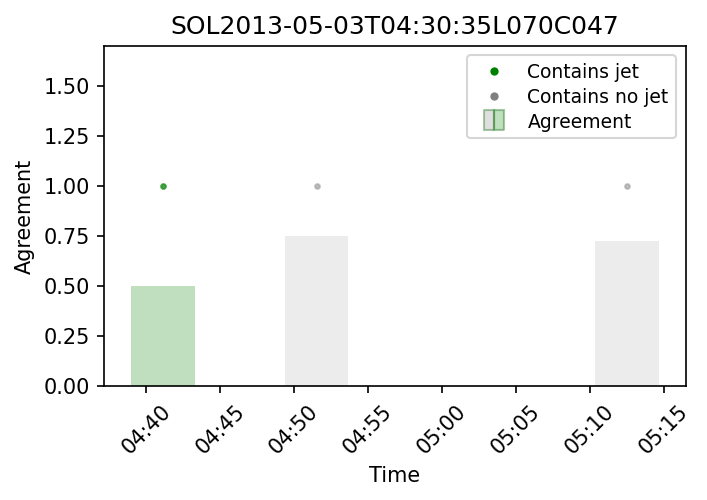

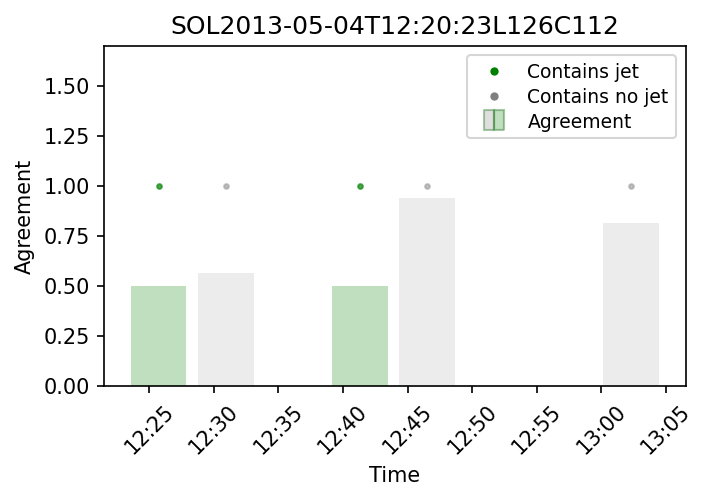

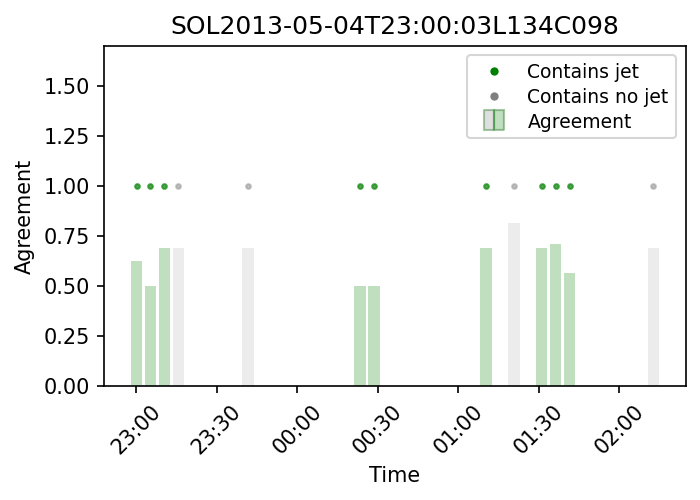

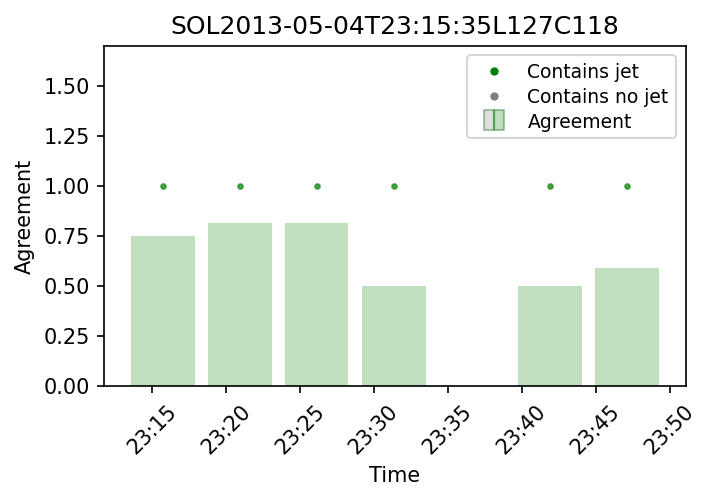

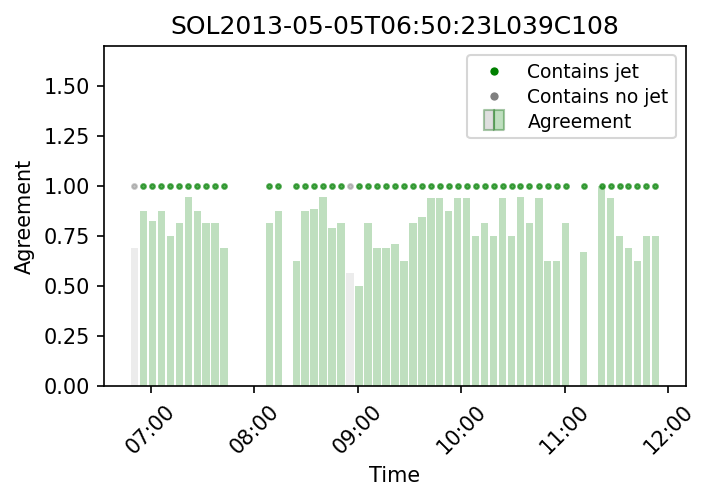

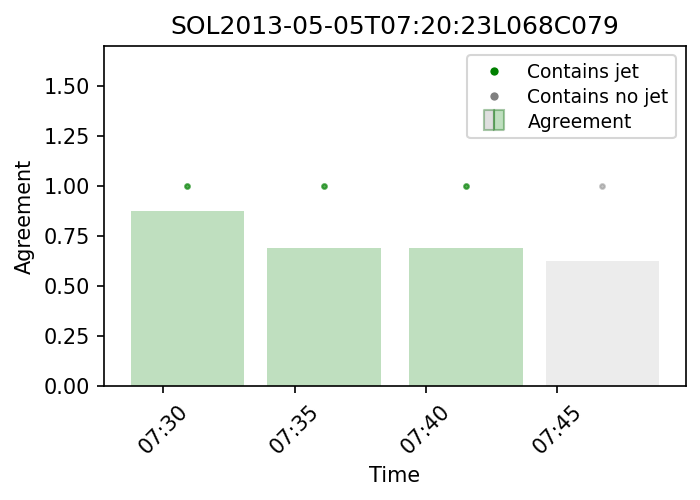

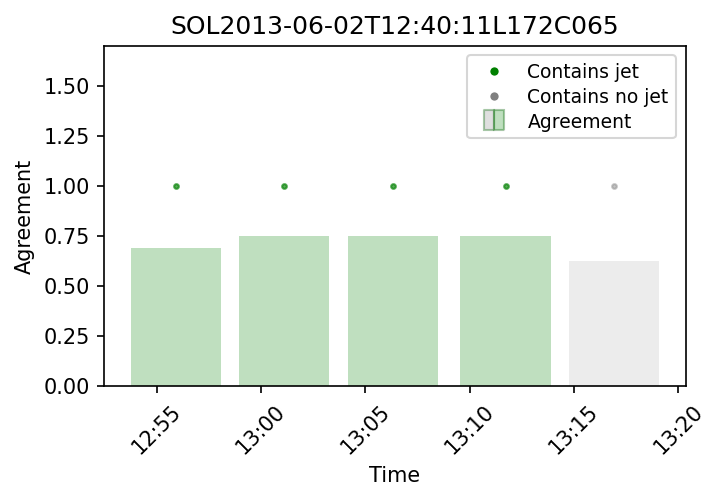

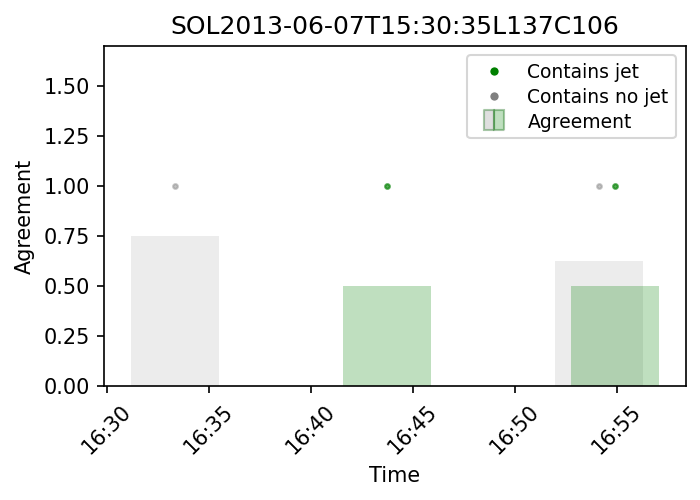

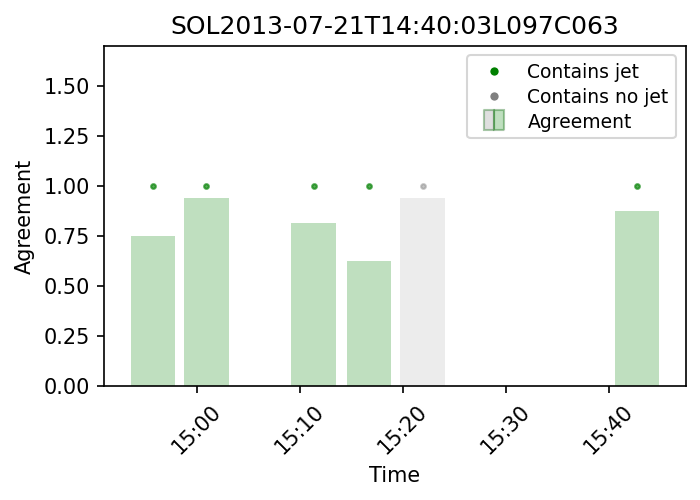

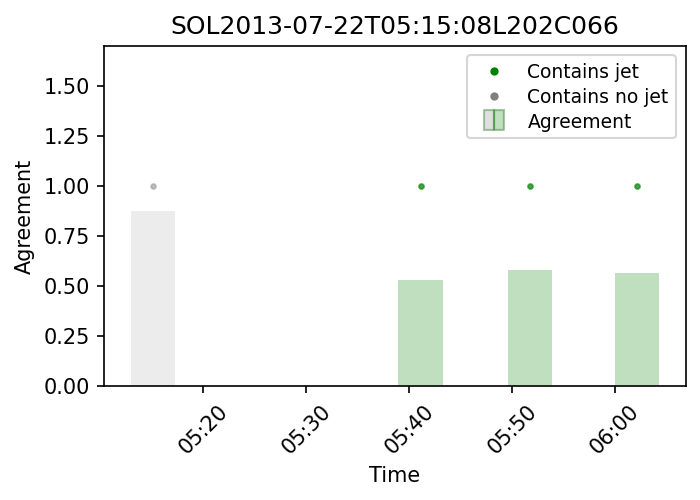

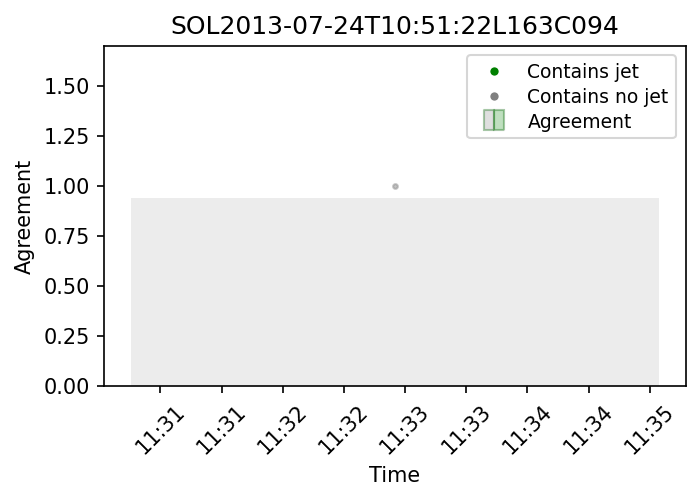

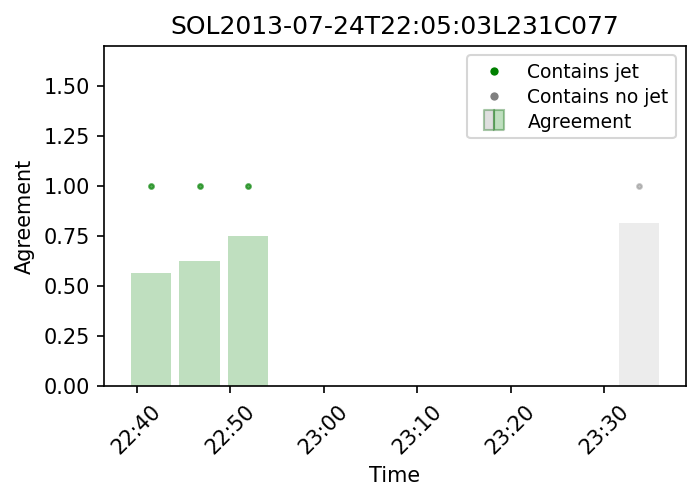

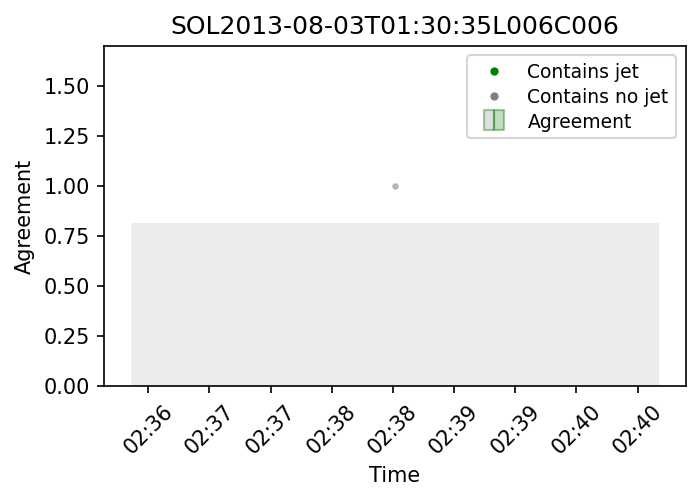

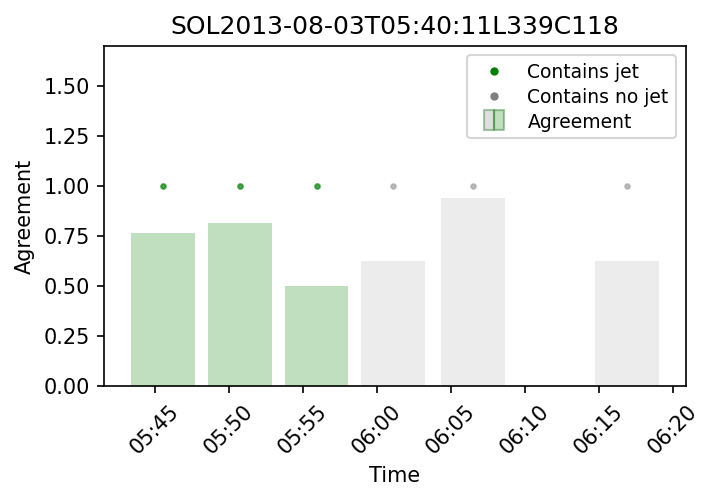

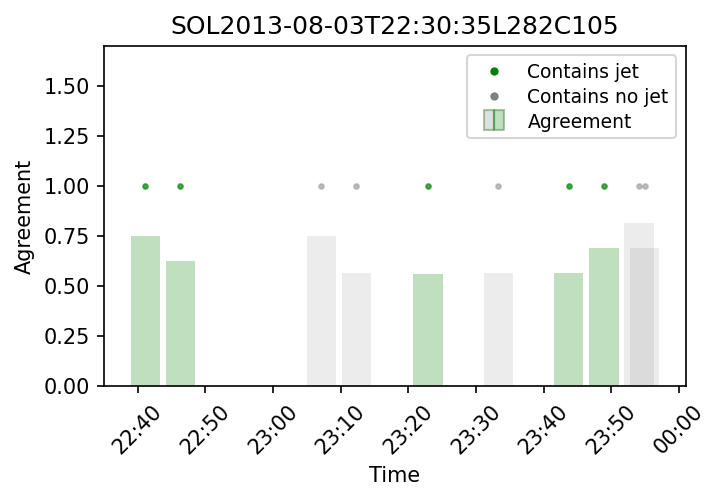

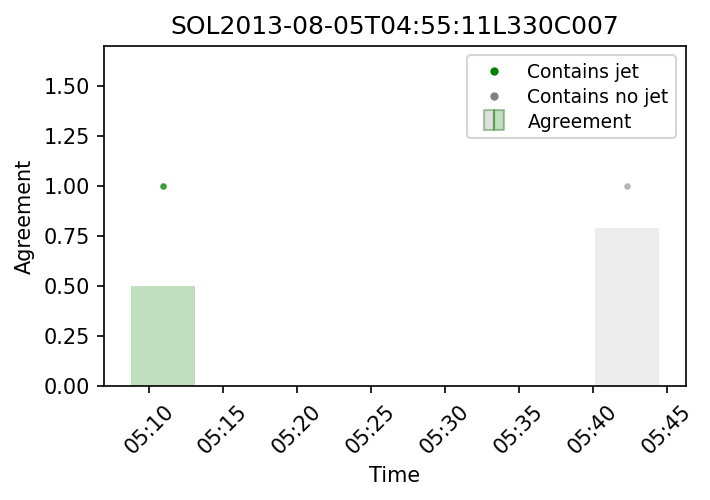

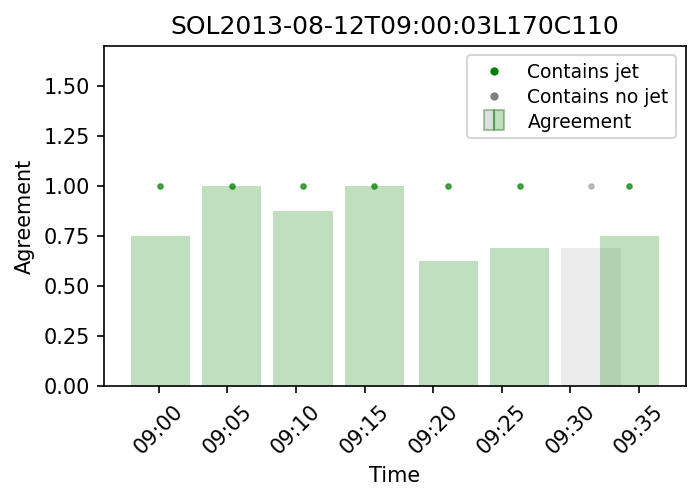

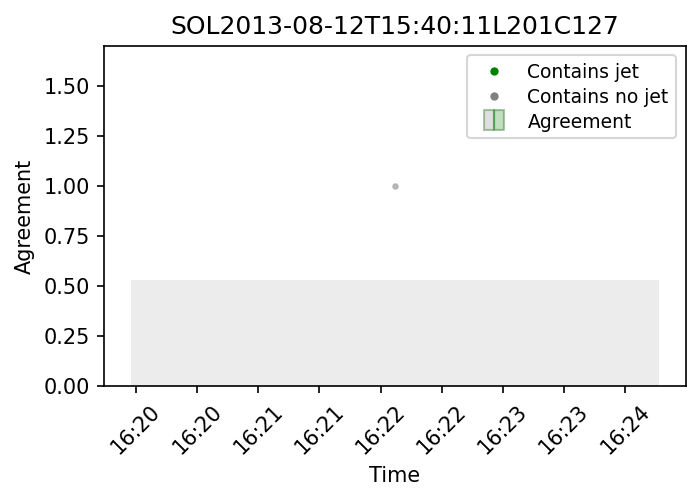

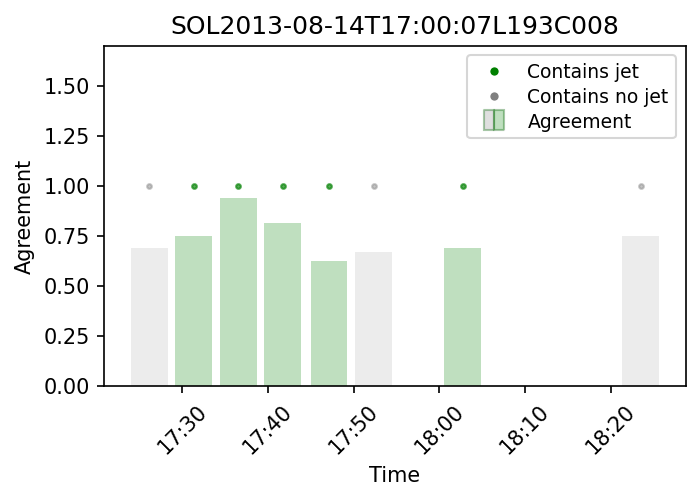

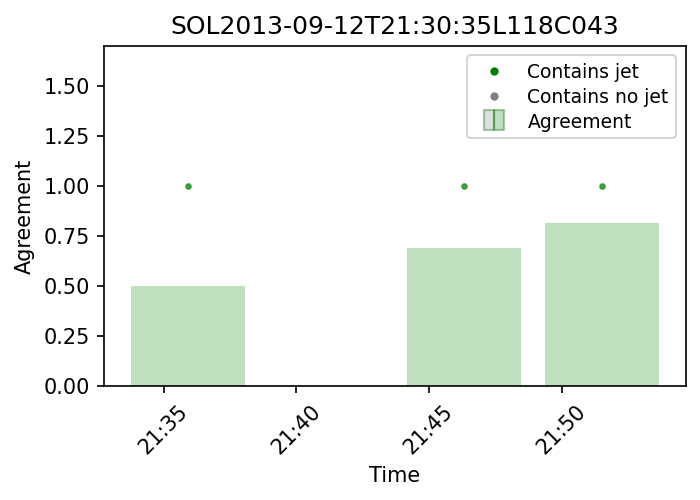

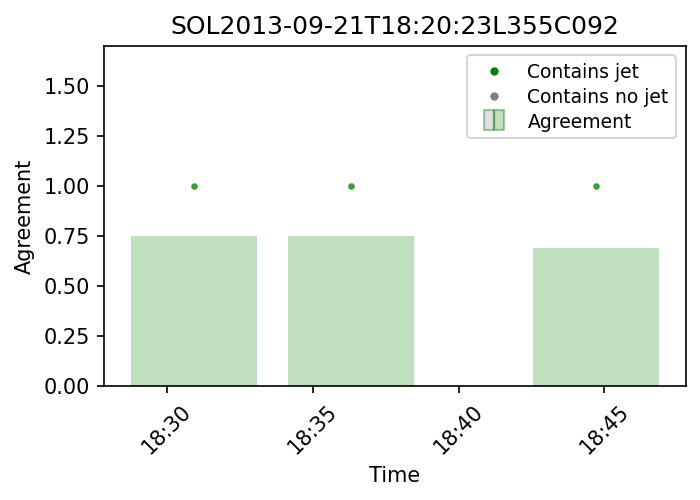

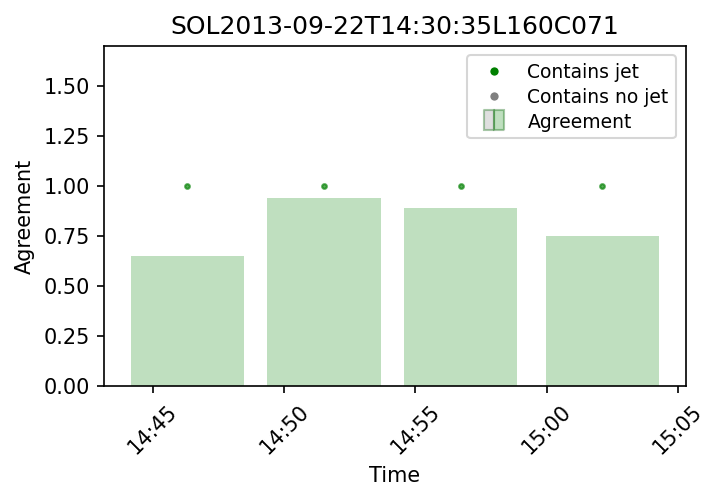

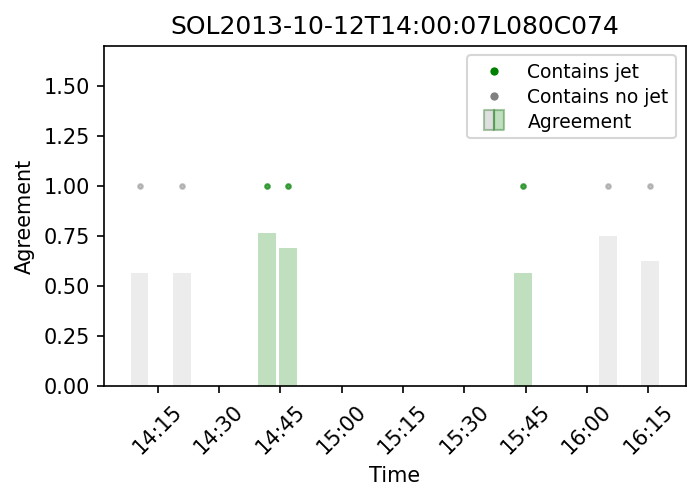

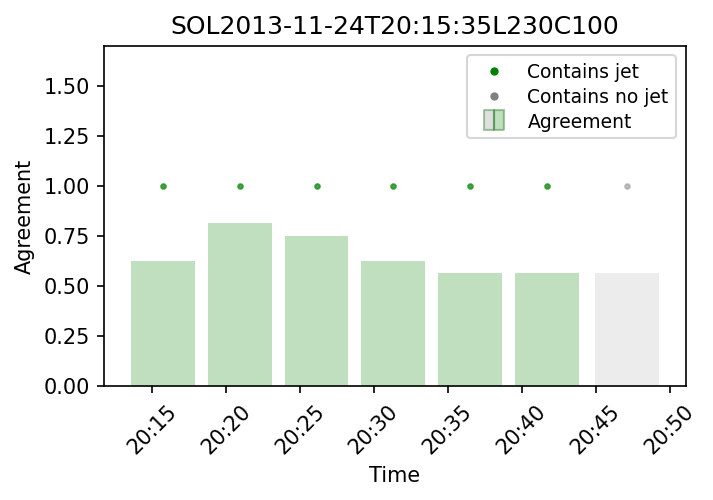

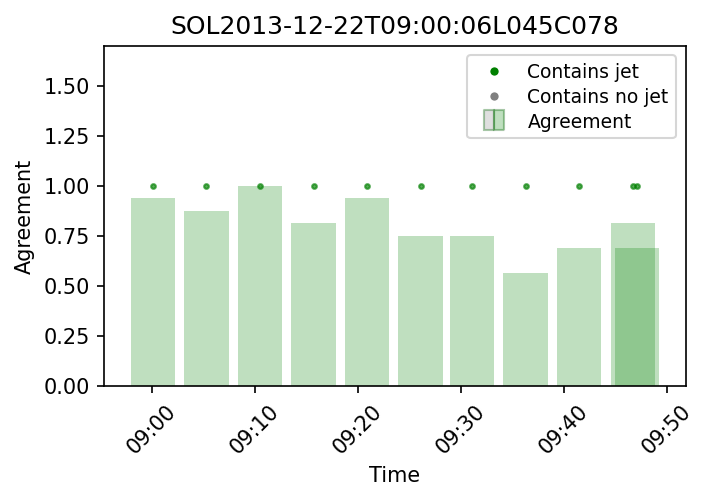

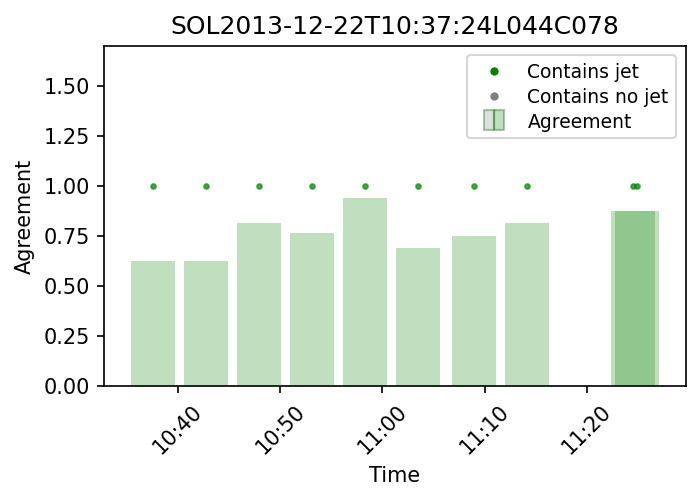

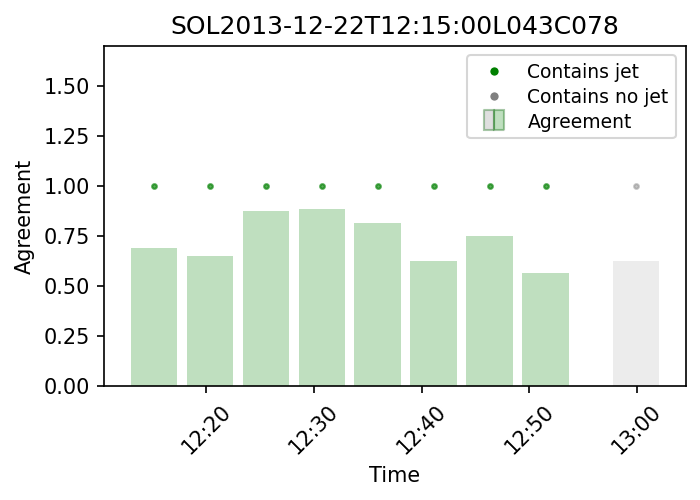

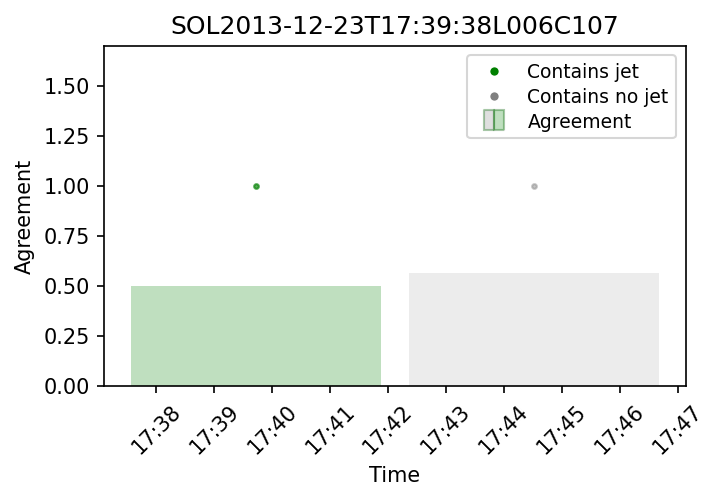

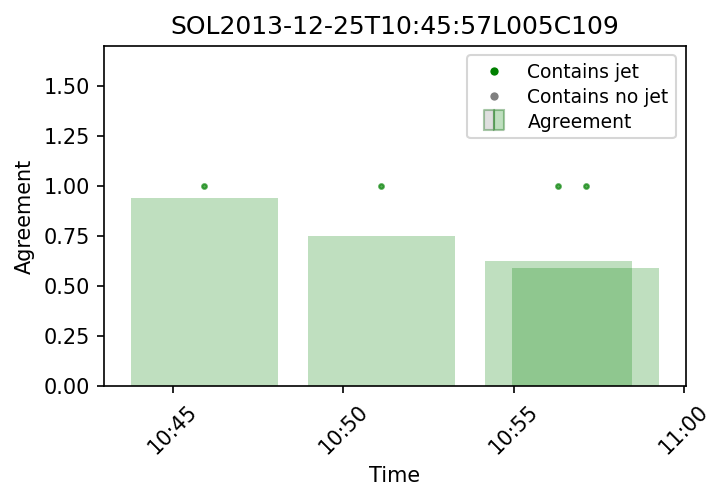

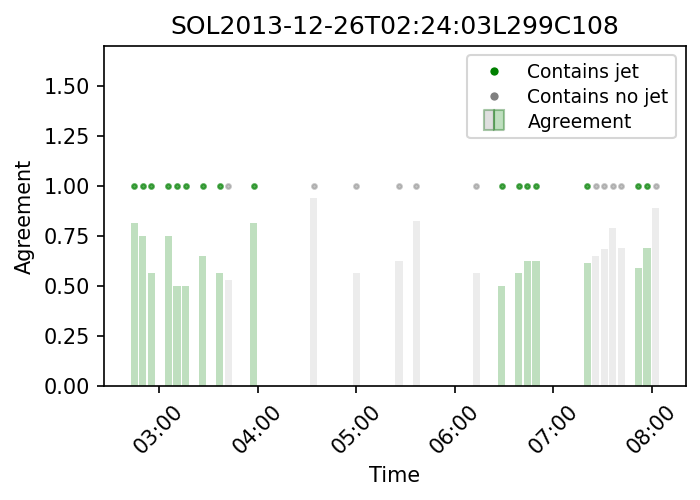

In [10]:
for sol in SOL_unique:
    sol_subjects=metafile.getSubjectIdBySolStandard(sol)
    sol_subjects_T3=[s for s in sol_subjects if s in subjects]
    data_sol = data_T3.get_data_by_idlist(sol_subjects_T3)
    # Calculate the agreement
    agreement, jet_mask, non_jet_mask, Ans = data_T3.Agr_mask(data_sol)
    obs_time= metafile.getSubjectByKeyByList(sol_subjects_T3, 'startDate')
    plot_agreement(sol,obs_time,agreement,jet_mask,non_jet_mask)